In [456]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

# **Extração de dados**

In [457]:
caminho = r"D:\##ANALISEDEDADOS\DATASETS\Human Resources Data Set\v2_HRDataset_v14.csv"
df = pd.read_csv(caminho, sep=";")
df.head()

,EmpID,Last_Name,First_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,10026,Adinolfi,Wilson K,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/1983,M,Single,US Citizen,No,White,07/05/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,10084,Ait Sidi,Karthikeyan,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/1975,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,10196,Akinkuolie,Sarah,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,07/05/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,10088,Alagbe,Trina,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,01/07/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15
4,10069,Anderson,Carol,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/1989,F,Divorced,US Citizen,No,White,07/11/2011,09/06/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2


In [458]:
df.shape

(311, 37)

# **Transformação de dados**

Transformando EmpID em índice

In [459]:
df.set_index("EmpID", inplace=True)

Permitindo visualização de todas as colunas

In [460]:
pd.set_option("display.max_columns", None)

Identificando valores nulos

In [461]:
df.isna().sum()

Last_Name                       0
First_Name                      0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Ajustando valores nulos da variável "DateofTermination"

In [462]:
hoje = datetime.now()
v2_hoje = datetime.strftime(hoje, "%d/%m/%Y")

In [463]:
#Valores nulos foram substituidos pela data atual uma vez que estavam nulos porque os funcionários ainda estão na empresa.
df["DateofTermination"] = df["DateofTermination"].fillna(v2_hoje)

Ajustando valores nulos da variável "ManagerID"

In [464]:
#Valores nulos estavam relacionados a um Manager especifico. Para solucionar, foi criado um ID para ele = 25.
df["ManagerID"] = df["ManagerID"].fillna(25.0)

Checando sucesso de manipulação de variáveis com dados nulos

In [465]:
df.isna().sum()

Last_Name                     0
First_Name                    0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

Identificando valores duplicados

In [466]:
df.duplicated().sum()

0

Identificando tipos de dados das variáveis

In [467]:
df.dtypes

Last_Name                      object
First_Name                     object
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

Ajustando tipo de dado das variáveis: DOB, DateofHire, DateofTermination, LastPerformanceReview_Date

In [468]:
df["DOB"] = df["DOB"].astype("datetime64[ns]")
df["DateofHire"] = df["DateofHire"].astype("datetime64[ns]")
df["DateofTermination"] = df["DateofTermination"].astype("datetime64[ns]")
df["LastPerformanceReview_Date"] = df["LastPerformanceReview_Date"].astype("datetime64[ns]")

Checando sucesso de alterações

In [469]:
df.dtypes

Last_Name                             object
First_Name                            object
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

Excluindo variáveis que não são de interesse para análise:

MarriedID;
MaritalStatusID;
GenderID;
DeptID;
PerfScoreID;
PositionID;
ManagerID;
FromDiversityJobFairID;
First_Name;
Last_Name;
Zip;
EmpStatusID

In [470]:
df.drop(columns=["MarriedID","MaritalStatusID","GenderID","DeptID","PerfScoreID","PositionID","ManagerID", "FromDiversityJobFairID", "First_Name", "Last_Name", "Zip", "EmpStatusID"], inplace=True)

Renomeando variáveis: "DOB" e "Termd"

In [471]:
df.rename(columns={
    "DOB" : "Dateofbirth",
    "Termd" : "Turnover?"
}, inplace=True)

Checando sucesso

In [472]:
df.head()

,Salary,Turnover?,Position,State,Dateofbirth,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,,,,
10026,62506,0,Production Technician I,MA,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,2024-06-05,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
10084,104437,1,Sr. DBA,MA,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
10196,64955,1,Production Technician II,MA,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
10088,64991,0,Production Technician I,MA,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,2024-06-05,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
10069,50825,1,Production Technician I,MA,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


Feature engineering (criando variável idade)

In [473]:
hoje = datetime.now()
df["idade"] = np.floor((hoje - df["Dateofbirth"]).dt.days / 365)

Criando variável faixa_etária

In [474]:
#identificando menor idade
df["idade"].min()

-50.0

**OBSERVAÇÃO:_** Foram identificados registros de funcionarios com valores de idade menores do que zero. #Percebi um possivel padrão de erro digitação de "20" ao invés de "19" que estava fazendo com que as datas de nascimento estivessem no futuro. Alteração deste padrão abaixo:

Separando ano, mes, dia da data

In [475]:
df["ano"] = df["Dateofbirth"].astype("str").str.split(pat="-", expand=True)[0]
df["mes"] = df["Dateofbirth"].astype("str").str.split(pat="-", expand=True)[1]
df["dia"] = df["Dateofbirth"].astype("str").str.split(pat="-", expand=True)[2]

Transformando o tipo da variavel ano para int

In [476]:
df["ano"] = df["ano"].astype("int")

Redefinindo valores da variavel ano maiores do que 2000

In [477]:
df["ano2"] = df.loc[:, "ano"].apply(lambda x: x - 100 if x > 2000 else x)

Criando nova coluna DOB atualizada (DOB2)

In [478]:
df["DOB_2"] = df["ano2"].astype("str").str.cat([df["mes"].astype("str"), df["dia"].astype("str")], sep="-")

Excluindo colunas auxiliares ano, mes, dia, ano2 e Dateofbirth (desatualizada)

In [479]:
df.drop(columns=["ano","mes","dia","ano2","Dateofbirth"], inplace=True)

Alterando tipo de dado da variavel DOB_2 assim como o nome da variavel para "DateofBirth"

In [480]:
df["DOB_2"] = df["DOB_2"].astype("datetime64[ns]")
df.rename(columns={"DOB_2" : "DateofBirth"}, inplace=True)

Checando sucesso

In [481]:
df.head()

,Salary,Turnover?,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,idade,DateofBirth
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,
10026,62506,0,Production Technician I,MA,M,Single,US Citizen,No,White,2011-07-05,2024-06-05,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,40.0,1983-07-10
10084,104437,1,Sr. DBA,MA,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,49.0,1975-05-05
10196,64955,1,Production Technician II,MA,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,35.0,1988-09-19
10088,64991,0,Production Technician I,MA,F,Married,US Citizen,No,White,2008-01-07,2024-06-05,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,35.0,1988-09-27
10069,50825,1,Production Technician I,MA,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,34.0,1989-09-08


Ajustando variável idade

In [482]:
hoje = datetime.now()
df["idade"] = np.floor((hoje - df["DateofBirth"]).dt.days / 365)

Dando sequencia à criação da variavel faixa_etaria segundo Sturges

In [483]:
#identificando menor idade (31)
df["idade"].min()
#identificando maior idade (73)
df["idade"].max()
#identificando qtd total de dados (311)
df["idade"].shape

#segundo sturges:
#numero de classes ~4.66. Arredondaremos para 5

bins = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
labels = [
"31−35",
"36−40",
"41−45",
"46−50",
"51−55",
"56−60",
"61−65",
"66−70",
"71−75"]

Criação, propriamente dita, da variável: "fx_etaria"

In [484]:
df["fx_etaria"] = pd.cut(
    df["idade"],
    bins=bins,
    labels=labels,
    right=True
)

Checando sucesso

In [485]:
df.head()

,Salary,Turnover?,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,idade,DateofBirth,fx_etaria
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,62506,0,Production Technician I,MA,M,Single,US Citizen,No,White,2011-07-05,2024-06-05,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,40.0,1983-07-10,36−40
10084,104437,1,Sr. DBA,MA,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,49.0,1975-05-05,46−50
10196,64955,1,Production Technician II,MA,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,35.0,1988-09-19,31−35
10088,64991,0,Production Technician I,MA,F,Married,US Citizen,No,White,2008-01-07,2024-06-05,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,35.0,1988-09-27,31−35
10069,50825,1,Production Technician I,MA,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,34.0,1989-09-08,31−35


Calculando e criando variavel tempo de empresa

In [486]:
df["TempoEmpresa (meses)"] = np.floor((hoje - df["DateofHire"]).dt.days / 30)

Checando sucesso

In [487]:
df.head()

,Salary,Turnover?,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,idade,DateofBirth,fx_etaria,TempoEmpresa (meses)
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,62506,0,Production Technician I,MA,M,Single,US Citizen,No,White,2011-07-05,2024-06-05,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,40.0,1983-07-10,36−40,156.0
10084,104437,1,Sr. DBA,MA,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,49.0,1975-05-05,46−50,110.0
10196,64955,1,Production Technician II,MA,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,35.0,1988-09-19,31−35,156.0
10088,64991,0,Production Technician I,MA,F,Married,US Citizen,No,White,2008-01-07,2024-06-05,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,35.0,1988-09-27,31−35,198.0
10069,50825,1,Production Technician I,MA,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,34.0,1989-09-08,31−35,156.0


Criando variavel faixa_tempo_empresa

In [488]:
#identificando menor tempo_empresa (70)
df["TempoEmpresa (meses)"].min()
#identificando maior tempo_empresa (222)
df["TempoEmpresa (meses)"].max()
#identificando qtd total de dados (311)
df["TempoEmpresa (meses)"].shape

bins = [69, 85.2, 100.4, 115.6, 130.8, 146, 161.2, 176.4, 191.6, 206.8, 223]
labels = [
"70-85.2",
"85.2-100.4",
"100.4-115.6",
"115.6-130.8",
"130.8-146",
"146-161.2",
"161.2-176.4",
"176.4-191.6",
"191.6-206.8",
"206.8-222"]

Criação, propriamente dita, da variável: "fx_tempo_empresa"

In [489]:
df["fx_tempo_empresa"] = pd.cut(
    df["TempoEmpresa (meses)"],
    bins=bins,
    labels=labels,
    right=False
)

Criação da variável Dias desde ultima avaliação de performance

In [490]:
hoje = datetime.now()


In [491]:
df["DiasUltAvaPerfom"] = (hoje -df["LastPerformanceReview_Date"]).dt.days

Checando sucesso

In [492]:
df.head(3)

,Salary,Turnover?,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,idade,DateofBirth,fx_etaria,TempoEmpresa (meses),fx_tempo_empresa,DiasUltAvaPerfom
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,62506,0,Production Technician I,MA,M,Single,US Citizen,No,White,2011-07-05,2024-06-05,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,40.0,1983-07-10,36−40,156.0,146-161.2,1936
10084,104437,1,Sr. DBA,MA,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,49.0,1975-05-05,46−50,110.0,100.4-115.6,2994
10196,64955,1,Production Technician II,MA,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,35.0,1988-09-19,31−35,156.0,146-161.2,4374


Checando valores nulos

In [493]:
df.isna().sum()

Salary                        0
Turnover?                     0
Position                      0
State                         0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
idade                         0
DateofBirth                   0
fx_etaria                     0
TempoEmpresa (meses)          0
fx_tempo_empresa              1
DiasUltAvaPerfom              0
dtype: int64

Checando valores duplicados

In [494]:
df.duplicated().sum()

0

Checando tipo de dados

In [495]:
df.dtypes

Salary                                 int64
Turnover?                              int64
Position                              object
State                                 object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
TermReason                            object
EmploymentStatus                      object
Department                            object
ManagerName                           object
RecruitmentSource                     object
PerformanceScore                      object
EngagementSurvey                     float64
EmpSatisfaction                        int64
SpecialProjectsCount                   int64
LastPerformanceReview_Date    datetime64[ns]
DaysLateLast30                         int64
Absences  

Alterando tipo de dado da variável idade e TempoEmpresa (meses) para int

In [496]:
df["idade"] = df["idade"].astype("int64")
df["TempoEmpresa (meses)"] = df["TempoEmpresa (meses)"].astype("int64")

Checando sucesso

In [497]:
df.dtypes

Salary                                 int64
Turnover?                              int64
Position                              object
State                                 object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
TermReason                            object
EmploymentStatus                      object
Department                            object
ManagerName                           object
RecruitmentSource                     object
PerformanceScore                      object
EngagementSurvey                     float64
EmpSatisfaction                        int64
SpecialProjectsCount                   int64
LastPerformanceReview_Date    datetime64[ns]
DaysLateLast30                         int64
Absences  

Excluindo variáveis dúbias 

#DateofHire; #DateofTermination; #DateofBirth

In [498]:
df.drop(columns=["DateofHire","DateofTermination","DateofBirth"], inplace=True)

In [499]:
df.head()

,Salary,Turnover?,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,idade,fx_etaria,TempoEmpresa (meses),fx_tempo_empresa,DiasUltAvaPerfom
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,62506,0,Production Technician I,MA,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,40,36−40,156,146-161.2,1936
10084,104437,1,Sr. DBA,MA,M,Married,US Citizen,No,White,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,49,46−50,110,100.4-115.6,2994
10196,64955,1,Production Technician II,MA,F,Married,US Citizen,No,White,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,35,31−35,156,146-161.2,4374
10088,64991,0,Production Technician I,MA,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,35,31−35,198,191.6-206.8,1950
10069,50825,1,Production Technician I,MA,F,Divorced,US Citizen,No,White,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,34,31−35,156,146-161.2,3017


## 1. Análise Exploratória

Medidas resumo de variáveis quantitativas

In [500]:
df_medidas_resumo = df.loc[:, ["Salary", "Turnover?", "EngagementSurvey", "EmpSatisfaction", "SpecialProjectsCount", "DaysLateLast30", "Absences", "idade", "TempoEmpresa (meses)", "DiasUltAvaPerfom"]]

In [501]:
df_medidas_resumo.describe()

,Salary,Turnover?,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,idade,TempoEmpresa (meses),DiasUltAvaPerfom
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,69020.684887,0.334405,4.110000,3.890675,1.218650,0.414791,10.237942,44.778135,136.453376,2429.112540
std,25156.636930,0.472542,0.789938,0.909241,2.349421,1.294519,5.852596,8.921827,23.819826,827.612978
min,45046.000000,0.000000,1.120000,1.000000,0.000000,0.000000,1.000000,31.000000,70.000000,1894.000000
25%,55501.500000,0.000000,3.690000,3.000000,0.000000,0.000000,5.000000,37.000000,116.500000,1918.000000
50%,62810.000000,0.000000,4.280000,4.000000,0.000000,0.000000,10.000000,43.000000,136.000000,1937.000000
75%,72036.000000,1.000000,4.700000,5.000000,0.000000,0.000000,15.000000,50.000000,156.000000,2969.500000
max,250000.000000,1.000000,5.000000,5.000000,8.000000,6.000000,20.000000,73.000000,223.000000,5045.000000


Tamanho da base

In [502]:
df.shape

(311, 26)

Considerações iniciais

1. Média de "Salary", "Turnover?", "SpecialProjectsCount", "DaysLateLast30" maiores do que respectivas medianas - indicando possível presença de outliers 

## 1.1 Análise univariada - Variáveis Quantitativas

### **Variável: Salary**

Criação de tabela de frequência

In [503]:
#identificando menor salario (45046)
df["Salary"].min()
#identificando maior salario (250000)
df["Salary"].max()
#identificando qtd salarios (311)
df["Salary"].shape

#Definindo bins e labels para usar na função cut
bins = [45045, 72449, 99852, 127255, 154658, 182061, 209464, 236867, 264270, 291673, 319076]
labels = [
    "45046 - 72449",
    "72449 - 99852",
    "99852 - 127255",
    "127255 - 154658",
    "154658 - 182061",
    "182061 - 209464",
    "209464 - 236867",
    "236867 - 264270",
    "264270 - 291673",
    "291673 - 319076"
]

In [504]:
df["fx_salario"] = pd.cut(
    df["Salary"],
    bins=bins,
    labels=labels,
    right=False
)

In [505]:
fx_salario = df["fx_salario"].value_counts().to_frame("freq_absoluta")

In [506]:
fx_salario["freq_relativa"] = df["fx_salario"].value_counts(1)

In [507]:
fx_salario["freq_acumulada"] = fx_salario["freq_relativa"].cumsum()

In [508]:
fx_salario

,freq_absoluta,freq_relativa,freq_acumulada
fx_salario,,,
45046 - 72449,235,0.755627,0.755627
72449 - 99852,51,0.163987,0.919614
99852 - 127255,15,0.048232,0.967846
127255 - 154658,4,0.012862,0.980707
154658 - 182061,4,0.012862,0.993569
209464 - 236867,1,0.003215,0.996785
236867 - 264270,1,0.003215,1.000000
182061 - 209464,0,0.000000,1.000000
264270 - 291673,0,0.000000,1.000000


Visualização de distribuição da variável: fx_salario

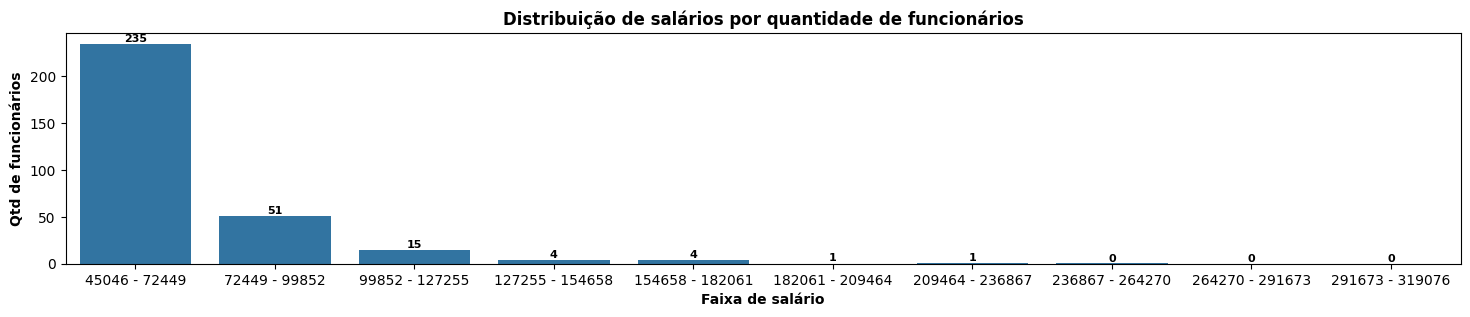

In [509]:
plt.figure(figsize=(18,3))

sns.barplot(
    fx_salario,
    x=fx_salario.index,
    y="freq_absoluta"
)

plt.title("Distribuição de salários por quantidade de funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("Faixa de salário", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})

for index, data in enumerate(fx_salario["freq_absoluta"]):
    plt.text(index, data+2, str(data), ha="center", weight="bold", size=8)


plt.show()

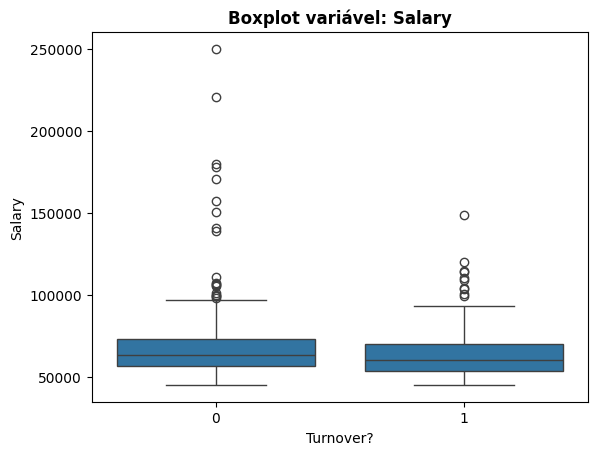

In [510]:
sns.boxplot(
    df,
    x="Turnover?",
    y="Salary"
)

plt.title("Boxplot variável: Salary", fontdict={"weight":"bold"});

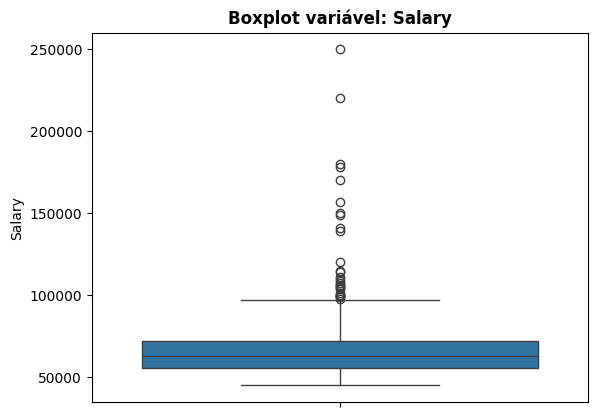

In [511]:
sns.boxplot(
    df["Salary"]
)

plt.title("Boxplot variável: Salary", fontdict={"weight":"bold"});

### **Variável: Turnover?**

Visualização de proporção da variável: Turnover?

C:\Users\55839\AppData\Local\Temp\ipykernel_52240\4238428088.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim = df[df["Turnover?"] == 1].count()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_52240\4238428088.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nao = df[df["Turnover?"] == 0].count()[0]


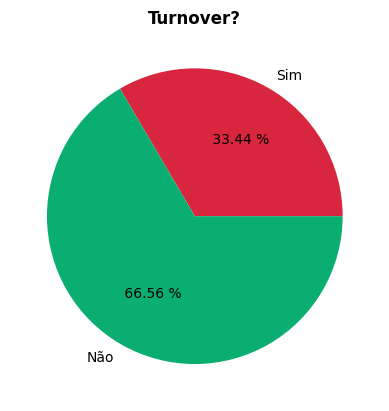

In [512]:
sim = df[df["Turnover?"] == 1].count()[0]
nao = df[df["Turnover?"] == 0].count()[0]

plt.pie(
    [sim, nao],
    labels = ["Sim", "Não"],
    colors = ["#D7263D", "#0BAE71"],
    autopct = "% .2f %%"
)

plt.title("Turnover?", fontdict={"fontweight":"bold"})

plt.show()

## Variável: EngagementSurvey

Criação de tabela de frequência

In [513]:
bins = [0, 1, 2, 3, 4, 6]
labels = [
    "0-1",
    "1-2",
    "2-3",
    "3-4",
    "4-5"
]

df["fx_EngagementSurvey"] = pd.cut(
    df["EngagementSurvey"],
    bins=bins,
    labels=labels,
    right=False
)

df["fx_EngagementSurvey"].astype("category")
df["fx_EngagementSurvey"].cat.reorder_categories(labels, ordered=True)

EmpID
10026    4-5
10084    4-5
10196    3-4
10088    4-5
10069    4-5
        ... 
10135    4-5
10301    3-4
10010    4-5
10043    4-5
10271    4-5
Name: fx_EngagementSurvey, Length: 311, dtype: category
Categories (5, object): ['0-1' < '1-2' < '2-3' < '3-4' < '4-5']

In [514]:
fx_EngagementSurvey = df["fx_EngagementSurvey"].value_counts().sort_values(ascending=True).to_frame("freq_absoluta")

In [515]:
fx_EngagementSurvey["freq_relativa"] = df["fx_EngagementSurvey"].value_counts(1).sort_values(ascending=True)

In [516]:
fx_EngagementSurvey["freq_acumulada"] = fx_EngagementSurvey["freq_relativa"].cumsum()

In [517]:
fx_EngagementSurvey

,freq_absoluta,freq_relativa,freq_acumulada
fx_EngagementSurvey,,,
0-1,0,0.000000,0.000000
1-2,5,0.016077,0.016077
2-3,17,0.054662,0.070740
3-4,84,0.270096,0.340836
4-5,205,0.659164,1.000000


Visualização de distribuição da variável: Engagement Survey

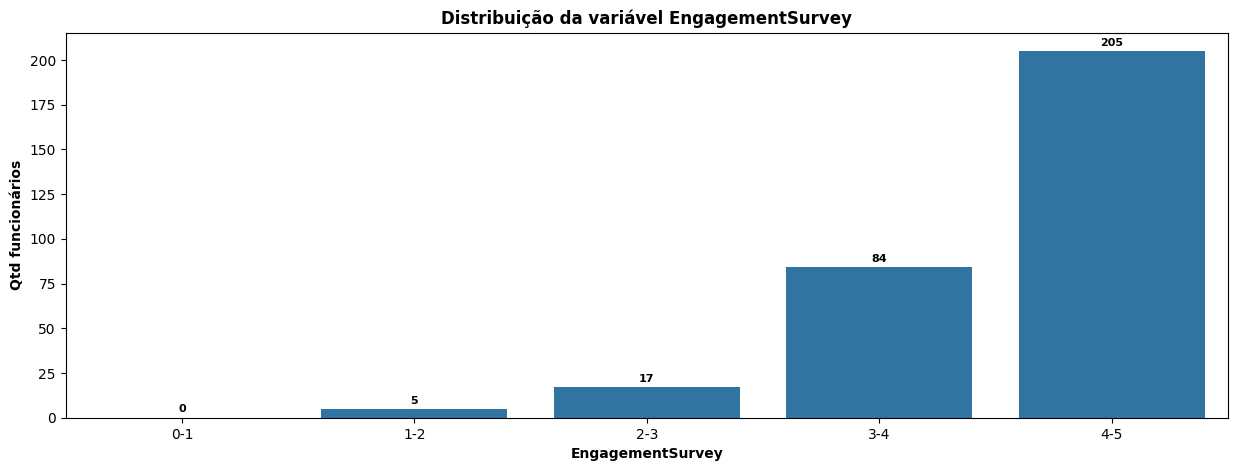

In [518]:
plt.figure(figsize=(15,5))

sns.barplot(
    fx_EngagementSurvey,
    x=fx_EngagementSurvey.index,
    y="freq_absoluta"
)

plt.title("Distribuição da variável EngagementSurvey", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("EngagementSurvey", fontdict={"fontweight":"bold"})

for index, data in enumerate(fx_EngagementSurvey["freq_absoluta"]):
    plt.text(index, data+3, str(data), ha="center", weight="bold", size=8)

ordem = ["0-1","1-2","2-3","3-4","4-5"]
plt.xticks(ordem);

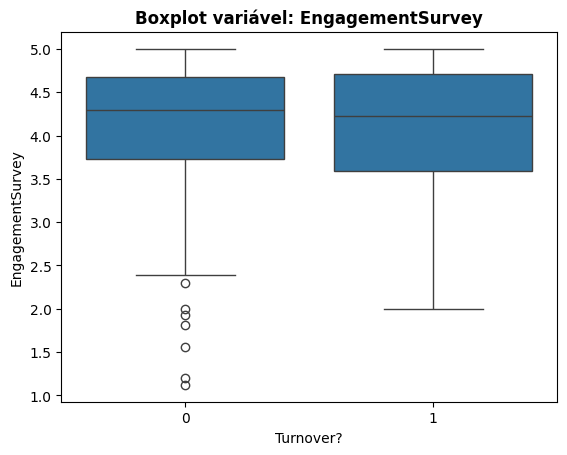

In [519]:
sns.boxplot(
    df,
    x="Turnover?",
    y="EngagementSurvey"    
)

plt.title("Boxplot variável: EngagementSurvey", fontdict={"weight":"bold"});

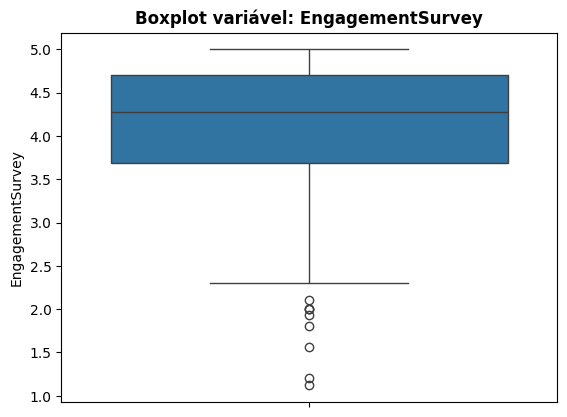

In [520]:
sns.boxplot(
    df["EngagementSurvey"]
)

plt.title("Boxplot variável: EngagementSurvey", fontdict={"weight":"bold"});

## Variável: EmpSatisfaction

Criação de tabela de frequência

In [521]:
ordem = [1,2,3,4,5]
df["EmpSatisfaction"] = df["EmpSatisfaction"].astype("category")
df["EmpSatisfaction"] = df["EmpSatisfaction"].cat.reorder_categories(ordem, ordered=True)

In [522]:
EmpSatisfaction = df["EmpSatisfaction"].value_counts().sort_index(ascending=True).to_frame("freq_absoluta")

In [523]:
EmpSatisfaction["freq_relativa"] = df["EmpSatisfaction"].value_counts(1).sort_index(ascending=True)

In [524]:
EmpSatisfaction["freq_acumulada"] = EmpSatisfaction["freq_relativa"].cumsum()

In [525]:
EmpSatisfaction

,freq_absoluta,freq_relativa,freq_acumulada
EmpSatisfaction,,,
1,2,0.006431,0.006431
2,9,0.028939,0.035370
3,108,0.347267,0.382637
4,94,0.302251,0.684887
5,98,0.315113,1.000000


Visualização de distribuição da variável: EmpSatisfaction

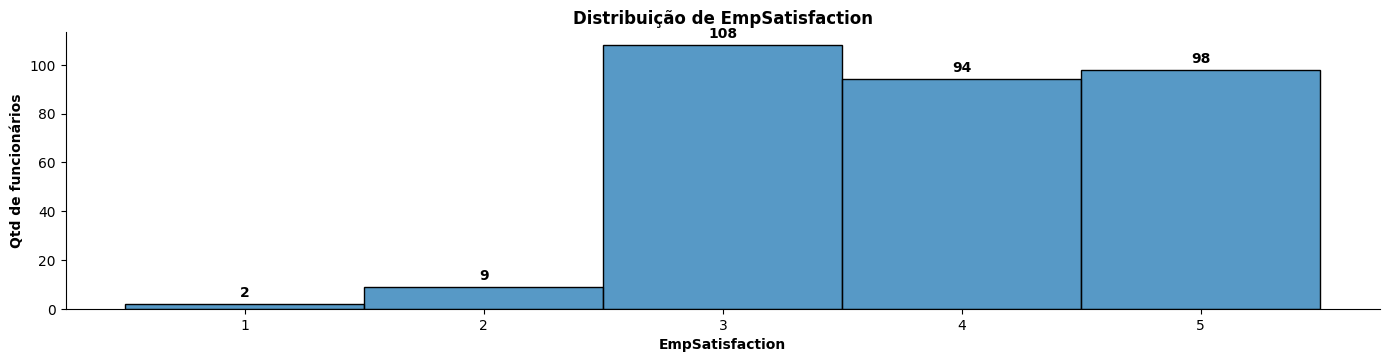

In [526]:
sns.displot(
    df["EmpSatisfaction"],
    height=3.5,
    aspect=4
)

plt.title("Distribuição de EmpSatisfaction", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("EmpSatisfaction", fontdict={"fontweight":"bold"})

for index, data in enumerate(EmpSatisfaction["freq_absoluta"]):
    plt.text(index+1, data+3, str(data), ha="center", weight="bold")

plt.show();

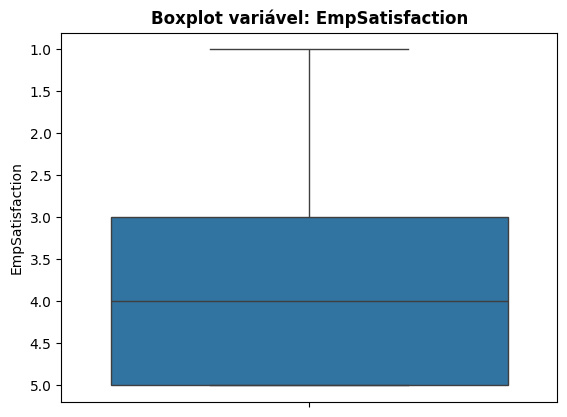

In [527]:
sns.boxplot(
    df["EmpSatisfaction"]
)

plt.title("Boxplot variável: EmpSatisfaction", fontdict={"weight":"bold"});

## Variável: SpecialProjectsCount

Criação de tabela de frequência

In [528]:
SpecialProjectsCount = df["SpecialProjectsCount"].value_counts().sort_index(ascending=True).to_frame("freq_absoluta")

In [529]:
SpecialProjectsCount["freq_relativa"] = df["SpecialProjectsCount"].value_counts(1).sort_index(ascending=True)

In [530]:
SpecialProjectsCount["freq_acumulada"] = SpecialProjectsCount["freq_relativa"].cumsum()

In [531]:
SpecialProjectsCount

,freq_absoluta,freq_relativa,freq_acumulada
SpecialProjectsCount,,,
0,241,0.774920,0.774920
1,1,0.003215,0.778135
2,1,0.003215,0.781350
3,3,0.009646,0.790997
4,9,0.028939,0.819936
5,21,0.067524,0.887460
6,21,0.067524,0.954984
7,12,0.038585,0.993569
8,2,0.006431,1.000000


Visualização de distribuição da variável: SpecialProjectsCount	

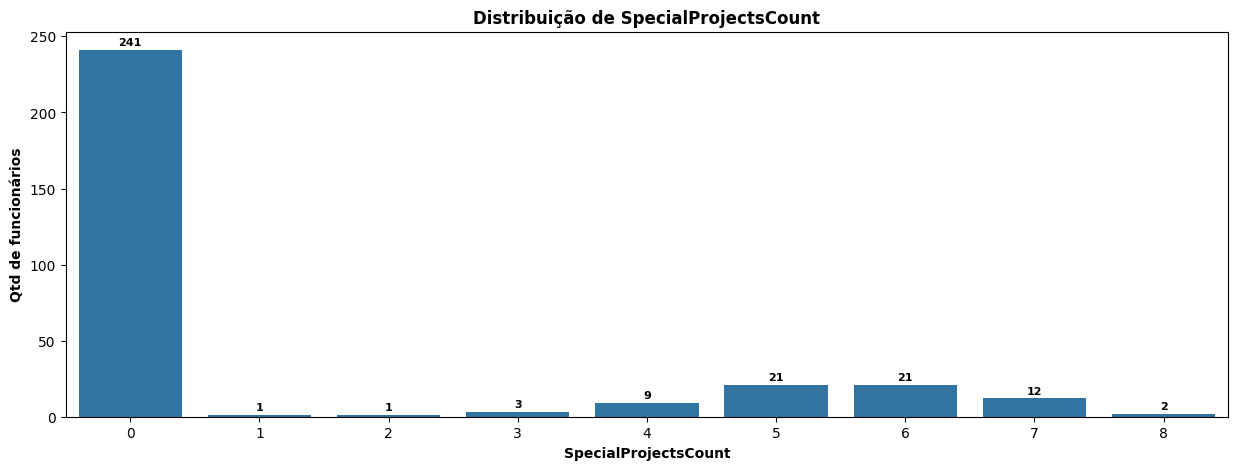

In [532]:
plt.figure(figsize=(15,5))

sns.barplot(
    SpecialProjectsCount,
    x=SpecialProjectsCount.index,
    y="freq_absoluta"
)

plt.title("Distribuição de SpecialProjectsCount", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("SpecialProjectsCount", fontdict={"fontweight":"bold"})

for index, data in enumerate(SpecialProjectsCount["freq_absoluta"]):
    plt.text(index, data+3, str(data), ha="center", weight="bold", size=8)
    
plt.show();

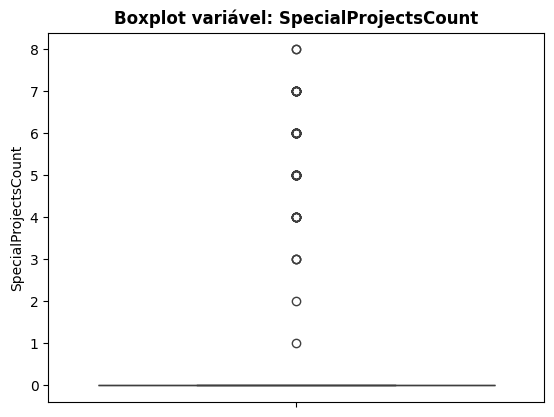

In [533]:
sns.boxplot(
    df["SpecialProjectsCount"]
)

plt.title("Boxplot variável: SpecialProjectsCount", fontdict={"weight":"bold"});

## Variável: DaysLateLast30

Criação de tabela de frequência

In [534]:
DaysLateLast30 = df["DaysLateLast30"].value_counts().sort_index(ascending=True).to_frame("freq_absoluta")

In [535]:
DaysLateLast30["freq_relativa"] = df["DaysLateLast30"].value_counts(1).sort_index(ascending=True)

In [536]:
DaysLateLast30["freq_acumulada"] = DaysLateLast30["freq_relativa"].cumsum()

In [537]:
DaysLateLast30

,freq_absoluta,freq_relativa,freq_acumulada
DaysLateLast30,,,
0,278,0.893891,0.893891
1,1,0.003215,0.897106
2,6,0.019293,0.916399
3,6,0.019293,0.935691
4,8,0.025723,0.961415
5,6,0.019293,0.980707
6,6,0.019293,1.000000


Visualização de distribuição da variável: DaysLateLast30	

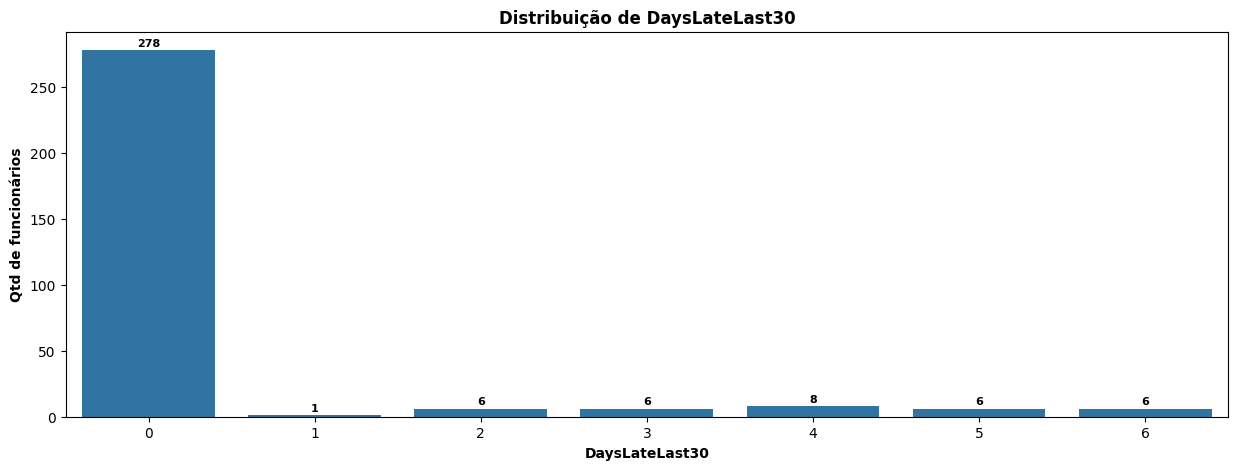

In [538]:
plt.figure(figsize=(15,5))

sns.barplot(
    DaysLateLast30,
    x=DaysLateLast30.index,
    y="freq_absoluta"
)

plt.title("Distribuição de DaysLateLast30", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("DaysLateLast30", fontdict={"fontweight":"bold"})

for index, data in enumerate(DaysLateLast30["freq_absoluta"]):
    plt.text(index, data+3, str(data), ha="center", weight="bold", size=8)

plt.show();

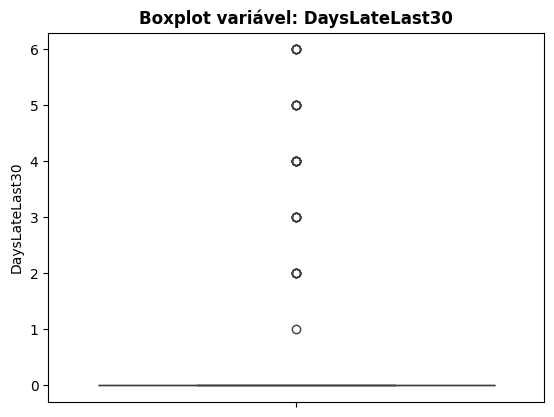

In [539]:
sns.boxplot(
    df["DaysLateLast30"]
)

plt.title("Boxplot variável: DaysLateLast30", fontdict={"weight":"bold"});

## Variável: Absences

Criação de tabela de frequência

In [540]:
bins = [0,2,4,6,8,10,12,14,16,18,20]
labels=[
    "0-2",
    "2-4",
    "4-6",
    "6-8",
    "8-10",
    "10-12",
    "12-14",
    "14-16",
    "16-18",
    "18-20"
]

df["fx_Absences"] = pd.cut(
    df["Absences"],
    bins=bins,
    labels=labels,
    right=False
)

In [541]:
Absences = df["fx_Absences"].value_counts().sort_index(ascending=True).to_frame("freq_absoluta")

In [542]:
Absences["freq_relativa"] = df["fx_Absences"].value_counts(1).sort_index(ascending=True)

In [543]:
Absences["freq_acumulada"] = Absences["freq_relativa"].cumsum()

In [544]:
Absences

,freq_absoluta,freq_relativa,freq_acumulada
fx_Absences,,,
0-2,14,0.047138,0.047138
2-4,37,0.124579,0.171717
4-6,35,0.117845,0.289562
6-8,37,0.124579,0.414141
8-10,25,0.084175,0.498316
10-12,25,0.084175,0.582492
12-14,25,0.084175,0.666667
14-16,37,0.124579,0.791246
16-18,38,0.127946,0.919192


Visualização de distribuição da variável: Absences	

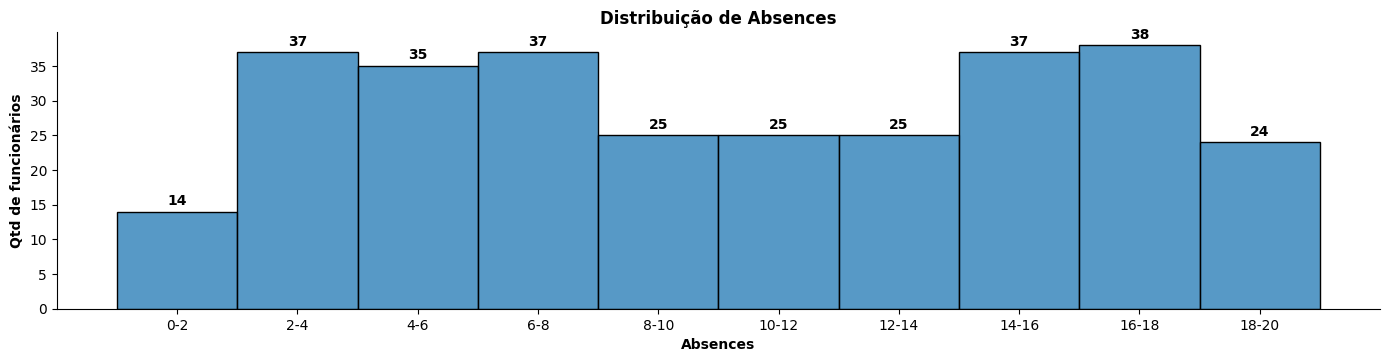

In [545]:
sns.displot(
    df["fx_Absences"],
    height=3.5,
    aspect=4
)

plt.title("Distribuição de Absences", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("Absences", fontdict={"fontweight":"bold"})

for index, data in enumerate(Absences["freq_absoluta"]):
    plt.text(index, data+1, str(data), ha="center", weight="bold")

plt.show();

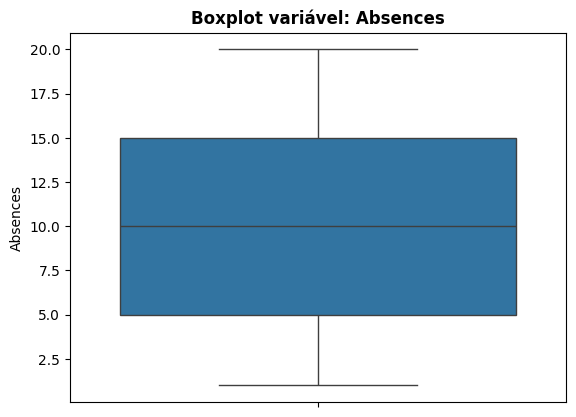

In [546]:
sns.boxplot(
    df["Absences"]
)

plt.title("Boxplot variável: Absences", fontdict={"weight":"bold"});

## Variável: Idade

Criação de tabela de frequência

In [547]:
fx_etaria = df["fx_etaria"].value_counts().to_frame("freq_absoluta")

In [548]:
fx_etaria.sort_index(ascending=True, inplace=True)

In [549]:
fx_etaria["freq_relativa"] = df["fx_etaria"].value_counts(1)

In [550]:
fx_etaria["freq_acumulada"] = fx_etaria["freq_relativa"].cumsum()

In [551]:
fx_etaria

,freq_absoluta,freq_relativa,freq_acumulada
fx_etaria,,,
31−35,38,0.122186,0.122186
36−40,88,0.282958,0.405145
41−45,63,0.202572,0.607717
46−50,47,0.151125,0.758842
51−55,39,0.125402,0.884244
56−60,21,0.067524,0.951768
61−65,5,0.016077,0.967846
66−70,4,0.012862,0.980707
71−75,6,0.019293,1.000000


Visualização de distribuição da variável: Idade	

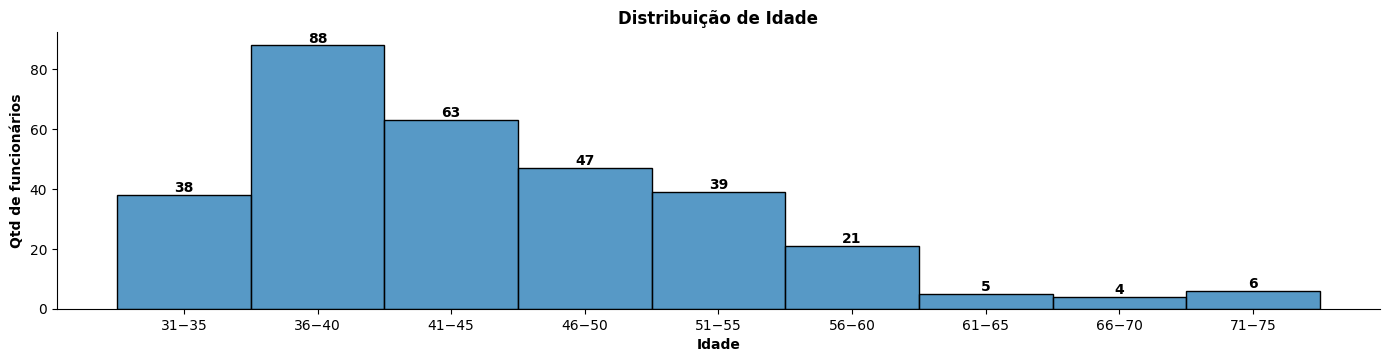

In [552]:
sns.displot(
    df["fx_etaria"],
    height=3.5,
    aspect=4
)

plt.title("Distribuição de Idade", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("Idade", fontdict={"fontweight":"bold"})

for index, data in enumerate(fx_etaria["freq_absoluta"]):
    plt.text(index, data+1, str(data), ha="center", weight="bold")
    
plt.show();

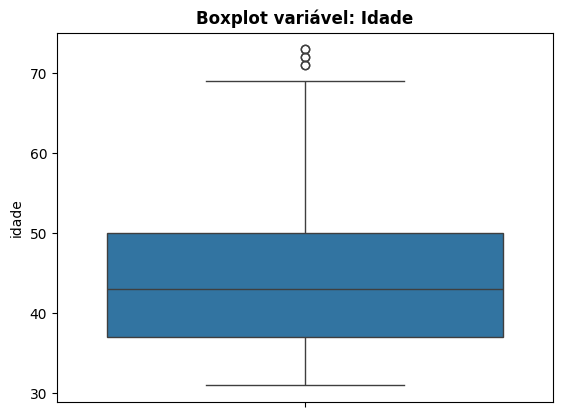

In [553]:
sns.boxplot(
    df["idade"]
)

plt.title("Boxplot variável: Idade", fontdict={"weight":"bold"});

## Variável: TempoEmpresa (meses)


Criação de tabela de frequência

In [554]:
fx_tempo_empresa = df["fx_tempo_empresa"].value_counts().sort_index(ascending=True).to_frame("freq_absoluta")

In [555]:
fx_tempo_empresa["freq_relativa"] = df["fx_tempo_empresa"].value_counts(1).sort_index(ascending=True)

In [556]:
fx_tempo_empresa["freq_acumulada"] = fx_tempo_empresa["freq_relativa"].cumsum()

In [557]:
fx_tempo_empresa

,freq_absoluta,freq_relativa,freq_acumulada
fx_tempo_empresa,,,
70-85.2,3,0.009677,0.009677
85.2-100.4,17,0.054839,0.064516
100.4-115.6,46,0.148387,0.212903
115.6-130.8,73,0.235484,0.448387
130.8-146,41,0.132258,0.580645
146-161.2,95,0.306452,0.887097
161.2-176.4,24,0.077419,0.964516
176.4-191.6,8,0.025806,0.990323
191.6-206.8,3,0.009677,1.000000


Visualização de distribuição da variável: TempoEmpresa (meses)

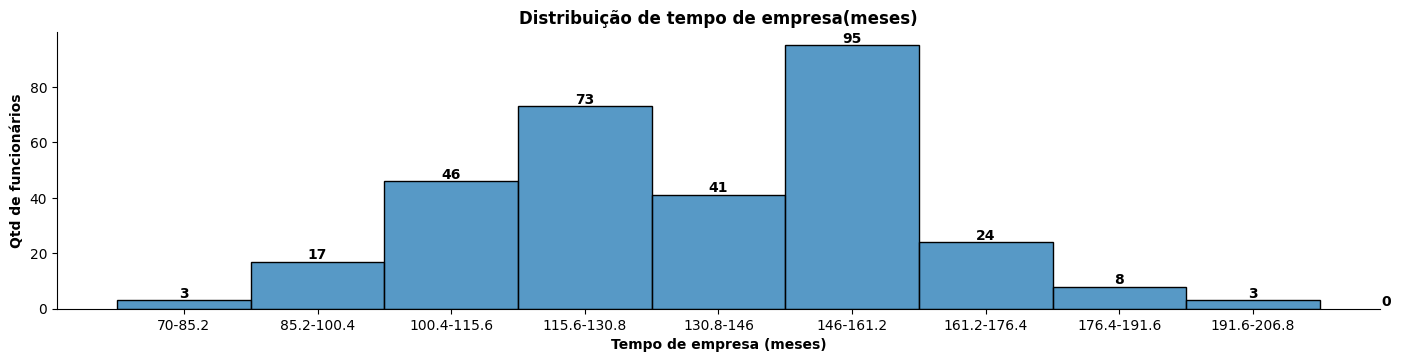

In [558]:
sns.displot(
    df["fx_tempo_empresa"],
    height=3.5,
    aspect=4
)

plt.title("Distribuição de tempo de empresa(meses)", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("Tempo de empresa (meses)", fontdict={"fontweight":"bold"})

for index, data in enumerate(fx_tempo_empresa["freq_absoluta"]):
    plt.text(index, data+1, str(data), ha="center", weight="bold")
    
plt.show();

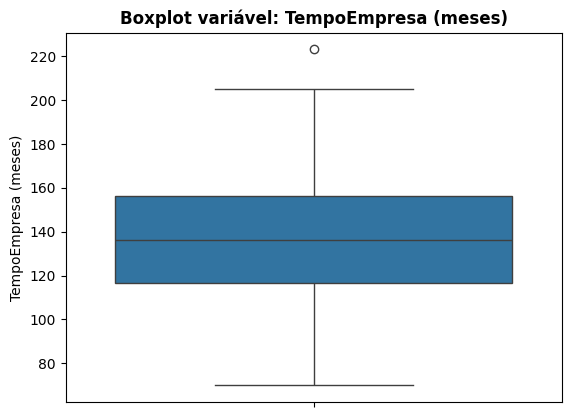

In [559]:
sns.boxplot(
    df["TempoEmpresa (meses)"]
)

plt.title("Boxplot variável: TempoEmpresa (meses)", fontdict={"weight":"bold"});

## Variável: DiasDesdeUltimaAvaliaçãoDePerformance

Criação de tabela de frequência

In [560]:
#criação da variavel "fx_DiasDesdeUltimaAvaliaçãoDePerformance"
#identificando maior valor 5037
df["DiasUltAvaPerfom"].max() 
#identificando menor valor 1885
df["DiasUltAvaPerfom"].min() 
#identificando tamanho 311
df["DiasUltAvaPerfom"].shape 

#Segundo sturges: 10 classes
bins = [1184, 2199, 2514, 2829, 3144, 3459, 3774, 4089, 4404, 4719, 5038]
labels = [
    "1885 - 2199",
    "2200 - 2514",
    "2515 - 2829",
    "2830 - 3144",
    "3145 - 3459",
    "3460 - 3774",
    "3775 - 4089",
    "4090 - 4404",
    "4405 - 4719",
    "4720 - 5037"
]



df["fx_DiasDesdeUltimaAvaliaçãoDePerformance"] = pd.cut(
    df["DiasUltAvaPerfom"],
    bins=bins,
    labels=labels,
    right=False
)

In [561]:
fx_DiasDesdeUltimaAvaliaçãoDePerformance = df["fx_DiasDesdeUltimaAvaliaçãoDePerformance"].value_counts().sort_index(ascending=True).to_frame("freq_absoluta")

In [562]:
fx_DiasDesdeUltimaAvaliaçãoDePerformance["freq_relativa"] = df["fx_DiasDesdeUltimaAvaliaçãoDePerformance"].value_counts(1).sort_index(ascending=True)

In [563]:
fx_DiasDesdeUltimaAvaliaçãoDePerformance["freq_acumulada"] = fx_DiasDesdeUltimaAvaliaçãoDePerformance["freq_relativa"].cumsum()

In [564]:
fx_DiasDesdeUltimaAvaliaçãoDePerformance

,freq_absoluta,freq_relativa,freq_acumulada
fx_DiasDesdeUltimaAvaliaçãoDePerformance,,,
1885 - 2199,209,0.674194,0.674194
2200 - 2514,9,0.029032,0.703226
2515 - 2829,9,0.029032,0.732258
2830 - 3144,18,0.058065,0.790323
3145 - 3459,23,0.074194,0.864516
3460 - 3774,9,0.029032,0.893548
3775 - 4089,10,0.032258,0.925806
4090 - 4404,12,0.038710,0.964516
4405 - 4719,8,0.025806,0.990323


Visualização de distribuição da variável: DiasDesdeUltimaAvaliaçãoDePerformance	

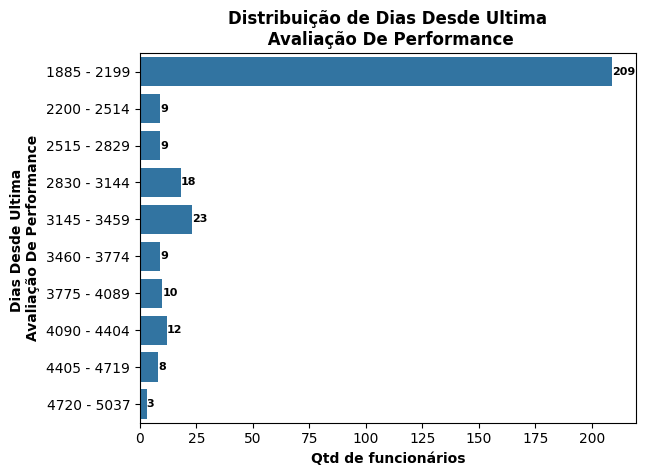

In [565]:
sns.barplot(
    fx_DiasDesdeUltimaAvaliaçãoDePerformance,
    x="freq_absoluta",
    y=fx_DiasDesdeUltimaAvaliaçãoDePerformance.index,
    orient="h"
)

plt.title(f"Distribuição de Dias Desde Ultima\n Avaliação De Performance", fontdict={"fontweight":"bold"})
plt.ylabel(f"Dias Desde Ultima \nAvaliação De Performance", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})
    
for index, data in enumerate(fx_DiasDesdeUltimaAvaliaçãoDePerformance["freq_absoluta"]):
    plt.text(data, index, str(data), ha="left", va="center", weight="bold", size=8)

plt.show();

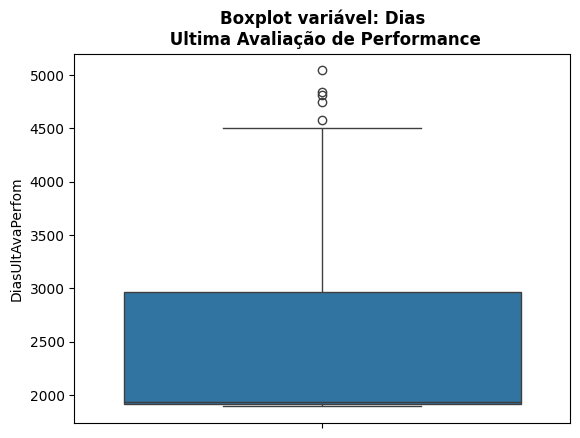

In [566]:
sns.boxplot(
    df["DiasUltAvaPerfom"]
)

plt.title(f"Boxplot variável: Dias\n Ultima Avaliação de Performance", fontdict={"weight":"bold"});

## 1.2 Análise univariada - Variáveis Qualitativas

## **Variável: Position**

Criando tabela de frequência

In [567]:
df["Position"].dtypes

dtype('O')

In [568]:
df["Position"] = df["Position"].astype("category")

In [569]:
position = df["Position"].value_counts(0).to_frame("freq_absoluta")

In [570]:
position["freq_relativa"] = df["Position"].value_counts(1)

In [571]:
position["freq_acumulada"] = position["freq_relativa"].cumsum()

In [572]:
position

,freq_absoluta,freq_relativa,freq_acumulada
Position,,,
Production Technician I,137,0.440514,0.440514
Production Technician II,57,0.183280,0.623794
Area Sales Manager,27,0.086817,0.710611
Production Manager,14,0.045016,0.755627
Software Engineer,10,0.032154,0.787781
IT Support,8,0.025723,0.813505
Data Analyst,7,0.022508,0.836013
Sr. Network Engineer,5,0.016077,0.852090
Database Administrator,5,0.016077,0.868167


Visualização de distribuição da variável: Position

In [573]:
ordem = ['Production Technician I', 'Production Technician II',
                  'Area Sales Manager', 'Production Manager',
                  'Software Engineer', 'IT Support', 'Data Analyst',
                  'Sr. Network Engineer', 'Database Administrator',
                  'Network Engineer', 'BI Developer',
                  'Administrative Assistant', 'Senior BI Developer',
                  'Sales Manager', 'Accountant I', 'Sr. DBA', 'Sr. Accountant',
                  'IT Manager - DB', 'IT Manager - Infra', 'Data Analyst ',
                  'Software Engineering Manager', 'BI Director',
                  'Shared Services Manager', 'CIO', 'Data Architect',
                  'Director of Operations', 'Director of Sales',
                  'Principal Data Architect', 'President & CEO',
                  'Enterprise Architect', 'IT Director',
                  'IT Manager - Support']

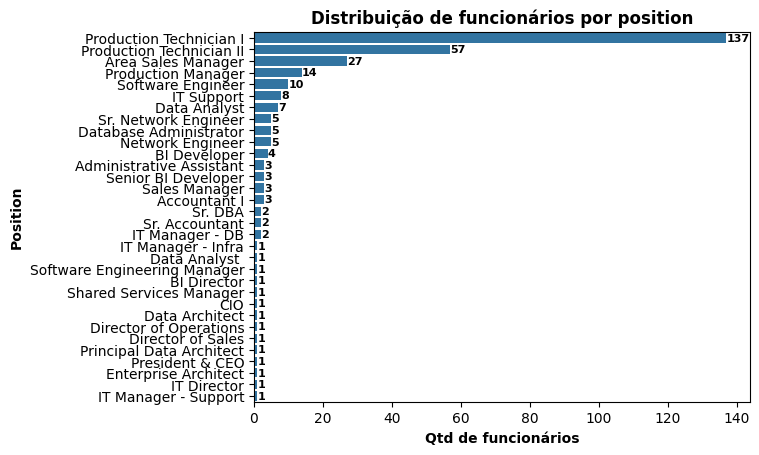

In [574]:
sns.barplot(
    position,
    y=ordem,
    x="freq_absoluta"
)

plt.title(f"Distribuição de funcionários por position", fontdict={"fontweight":"bold"})
plt.ylabel(f"Position", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})

for index, data in enumerate(position["freq_absoluta"]):
    plt.text(data, index, str(data), ha="left", va="center", weight="bold", size=8)

plt.yticks(ordem)

plt.show()

### **Variável: State**

Criando tabela de frequência

In [575]:
state = df["State"].value_counts().to_frame("freq_absoluta")
state["freq_relativa"] = df["State"].value_counts(1)
state["freq_acumulada"] = state["freq_relativa"].cumsum()

In [576]:
state

,freq_absoluta,freq_relativa,freq_acumulada
State,,,
MA,276,0.887460,0.887460
CT,6,0.019293,0.906752
TX,3,0.009646,0.916399
VT,2,0.006431,0.922830
UT,1,0.003215,0.926045
AZ,1,0.003215,0.929260
ND,1,0.003215,0.932476
OR,1,0.003215,0.935691
MT,1,0.003215,0.938907


Visualização de distribuição da variável: State

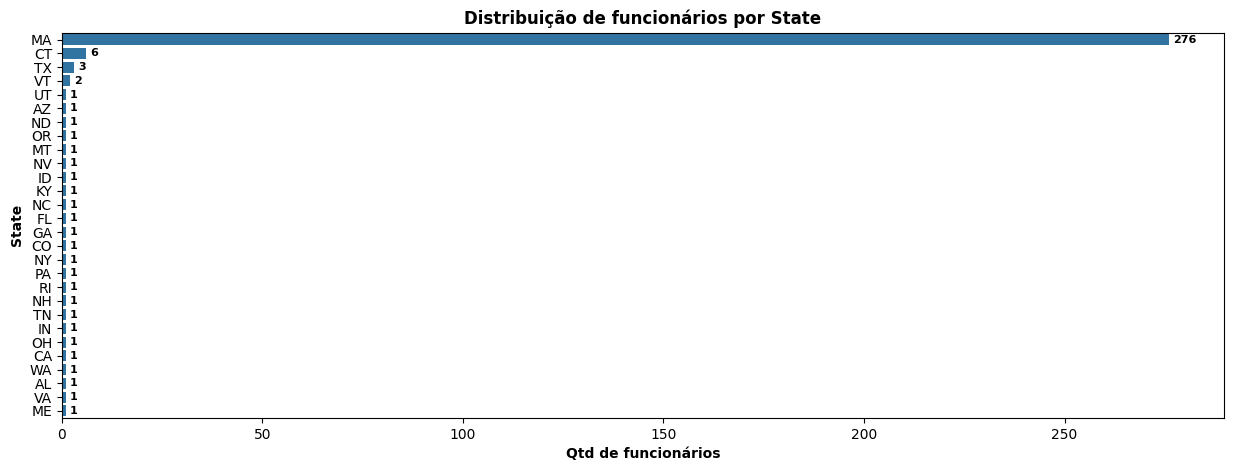

In [577]:
plt.figure(figsize=(15,5))

sns.barplot(
    state, 
    y=state.index,
    x="freq_absoluta",
    orient="h"
)

plt.title("Distribuição de funcionários por State", fontdict={"fontweight":"bold"})
plt.ylabel("State", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})


for index, data in enumerate(state["freq_absoluta"]):
    plt.text(data+1, index, str(data), ha="left", va="center", weight="bold", size=8)

plt.show();

### **Variável: Sex**

Visualização de proporção da variável: Sex

C:\Users\55839\AppData\Local\Temp\ipykernel_52240\3656289566.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feminino = df["Sex"].value_counts()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_52240\3656289566.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  masculino = df["Sex"].value_counts()[1]


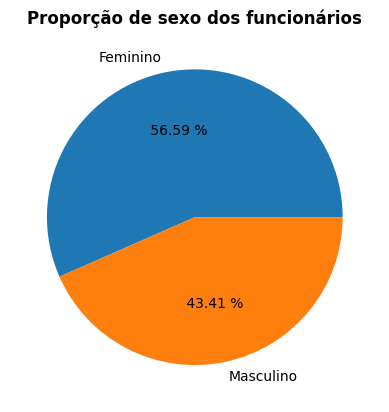

In [578]:
feminino = df["Sex"].value_counts()[0]
masculino = df["Sex"].value_counts()[1]

plt.pie(
    [feminino, masculino],
    labels=["Feminino", "Masculino"],
    autopct= "% .2f %%"
)

plt.title("Proporção de sexo dos funcionários", fontdict={"fontweight":"bold"})

plt.show()

### **Variável: MaritalDesc**

Criando tabela de frequeência

In [579]:
estado_civil = df["MaritalDesc"].value_counts().to_frame("freq_absoluta")
estado_civil["freq_relativa"] = df["MaritalDesc"].value_counts(1)
estado_civil["freq_acumulada"] = estado_civil["freq_relativa"].cumsum()

In [580]:
estado_civil

,freq_absoluta,freq_relativa,freq_acumulada
MaritalDesc,,,
Single,137,0.440514,0.440514
Married,124,0.398714,0.839228
Divorced,30,0.096463,0.935691
Separated,12,0.038585,0.974277
Widowed,8,0.025723,1.000000


Visualização de distribuição da variável: MaritalDesc

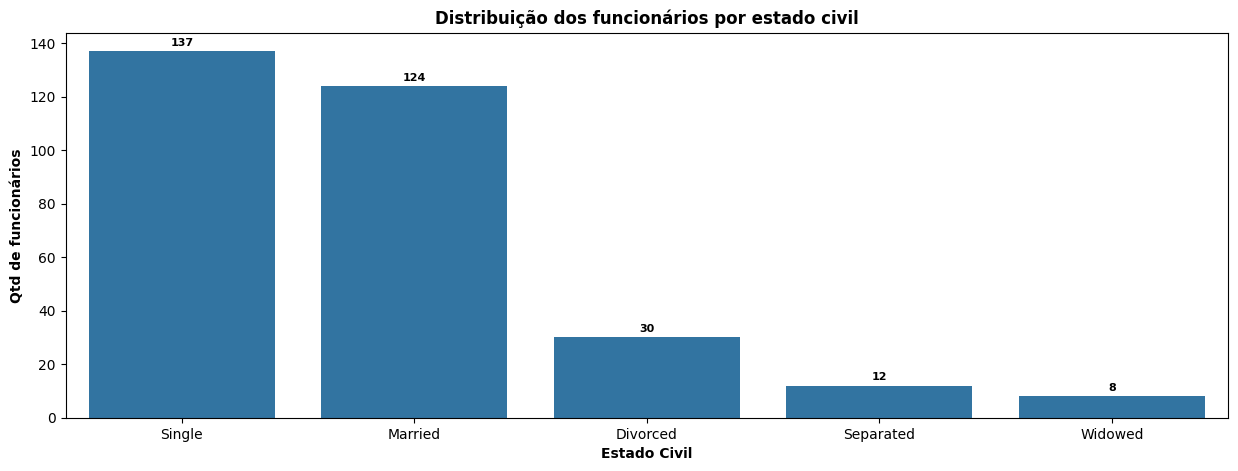

In [581]:
plt.figure(figsize=(15,5))

sns.barplot(
    estado_civil, 
    x=estado_civil.index,
    y="freq_absoluta"
)

plt.title("Distribuição dos funcionários por estado civil", fontdict={"fontweight":"bold"})
plt.xlabel("Estado Civil", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})


for index, data in enumerate(estado_civil["freq_absoluta"]):
    plt.text(index, data+2, str(data), ha="center", weight="bold", size=8)

plt.show();

### **Variável: CitizenDesc**

Criando tabela de frequências

In [582]:
nacionalidade = df["CitizenDesc"].value_counts().to_frame("freq_absoluta")
nacionalidade["freq_relativa"] = df["CitizenDesc"].value_counts(1)
nacionalidade["freq_acumulada"] = nacionalidade["freq_relativa"].cumsum()

In [583]:
nacionalidade

,freq_absoluta,freq_relativa,freq_acumulada
CitizenDesc,,,
US Citizen,295,0.948553,0.948553
Eligible NonCitizen,12,0.038585,0.987138
Non-Citizen,4,0.012862,1.000000


Visualização de proporção da variável: CitizenDesc

C:\Users\55839\AppData\Local\Temp\ipykernel_52240\1509119201.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  US_Citizen = df["CitizenDesc"].value_counts()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_52240\1509119201.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Eligible_NonCitizen = df["CitizenDesc"].value_counts()[1]
C:\Users\55839\AppData\Local\Temp\ipykernel_52240\1509119201.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

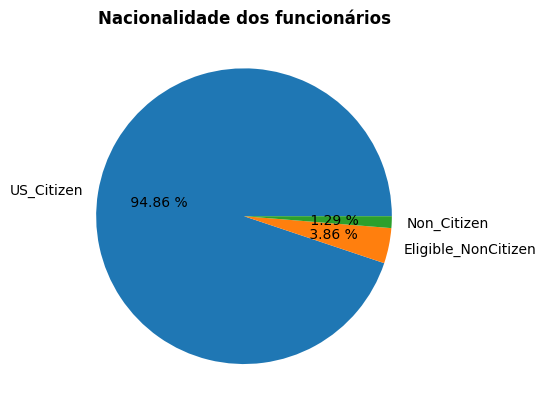

In [584]:
US_Citizen = df["CitizenDesc"].value_counts()[0]
Eligible_NonCitizen = df["CitizenDesc"].value_counts()[1]
Non_Citizen	= df["CitizenDesc"].value_counts()[2]

plt.pie(
    [US_Citizen, Eligible_NonCitizen, Non_Citizen],
    labels=["US_Citizen", "Eligible_NonCitizen", "Non_Citizen"],
    autopct = "% .2f %%"
)

plt.title("Nacionalidade dos funcionários", fontdict={"fontweight":"bold"})

plt.show()

### **Variável: HispanicLatino**

Visualização de proporção da variável: HispanicLatino

In [585]:
df["HispanicLatino"].value_counts()

HispanicLatino
No     282
Yes     27
no       1
yes      1
Name: count, dtype: int64

In [586]:
#Tratando dados non case sensitive
df["HispanicLatino"] = df["HispanicLatino"].map(
    {
        "No" : "No",
        "Yes" : "Yes",
        "no" : "No",
        "yes" : "Yes"
    }
)

C:\Users\55839\AppData\Local\Temp\ipykernel_52240\1132063724.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no = df["HispanicLatino"].value_counts()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_52240\1132063724.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yes = df["HispanicLatino"].value_counts()[1]


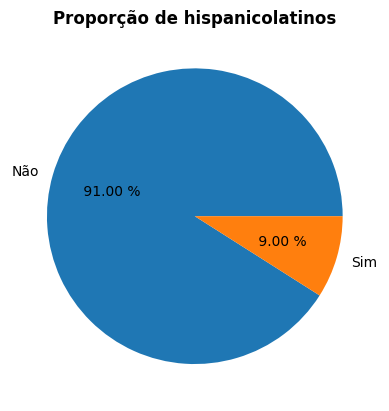

In [587]:
no = df["HispanicLatino"].value_counts()[0]
yes = df["HispanicLatino"].value_counts()[1]

plt.pie(
    [no, yes],
    labels=["Não", "Sim"],
    autopct = "% .2f %%"
)

plt.title("Proporção de hispanicolatinos", fontdict={"fontweight":"bold"})

plt.show()

### **Variável: RaceDesc**

Criando tabelas de frequência

In [588]:
etnia = df["RaceDesc"].value_counts().to_frame("freq_absoluta")

In [589]:
etnia["freq_relativa"] = df["RaceDesc"].value_counts(1)

In [590]:
etnia["freq_acumulada"] = etnia["freq_relativa"].cumsum()

In [591]:
etnia

,freq_absoluta,freq_relativa,freq_acumulada
RaceDesc,,,
White,187,0.601286,0.601286
Black or African American,80,0.257235,0.858521
Asian,29,0.093248,0.951768
Two or more races,11,0.035370,0.987138
American Indian or Alaska Native,3,0.009646,0.996785
Hispanic,1,0.003215,1.000000


Visualização de distribuição da variável: RaceDesc

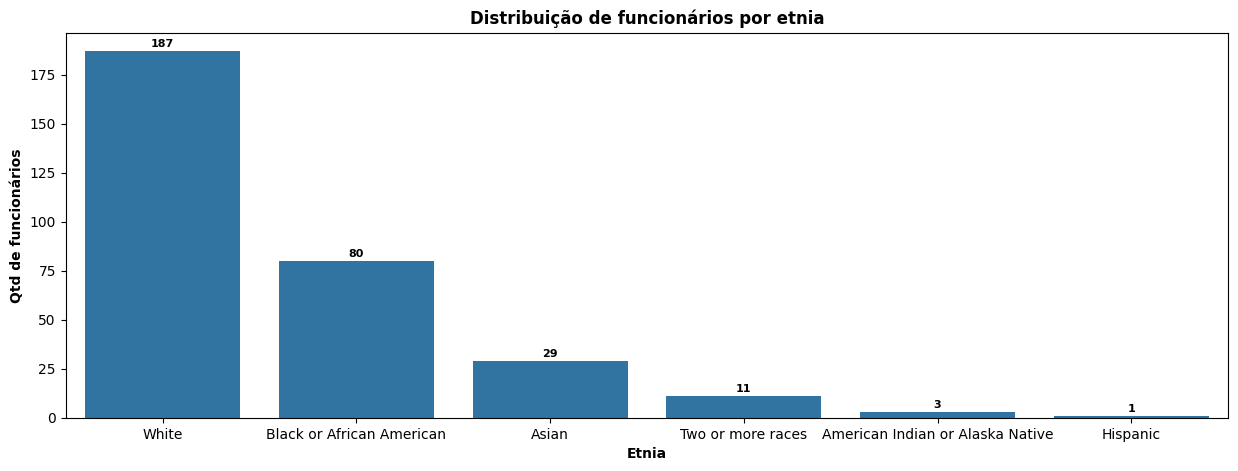

In [592]:
plt.figure(figsize=(15,5))

sns.barplot(
    etnia,
    x=etnia.index,
    y="freq_absoluta"
)

plt.title("Distribuição de funcionários por etnia", fontdict={"fontweight":"bold"})
plt.ylabel("Qtd de funcionários", fontdict={"fontweight":"bold"})
plt.xlabel("Etnia", fontdict={"fontweight":"bold"})

for index, data in enumerate(etnia["freq_absoluta"]):
    plt.text(index, data+2, str(data), ha="center", size=8, weight="bold")
    
plt.show();

## Variável: Termreason

Criando tabelas de frequência

In [593]:
TermReason = df["TermReason"].value_counts().to_frame("freq_absoluta")

In [594]:
TermReason["freq_relativa"] = df["TermReason"].value_counts(1)

In [595]:
TermReason["freq_acumulada"] = TermReason["freq_relativa"].cumsum()

In [596]:
TermReason

,freq_absoluta,freq_relativa,freq_acumulada
TermReason,,,
N/A-StillEmployed,207,0.665595,0.665595
Another position,20,0.064309,0.729904
unhappy,14,0.045016,0.774920
more money,11,0.035370,0.810289
career change,9,0.028939,0.839228
hours,8,0.025723,0.864952
attendance,7,0.022508,0.887460
return to school,5,0.016077,0.903537
relocation out of area,5,0.016077,0.919614


Visualização de distribuição da variável: Termreason

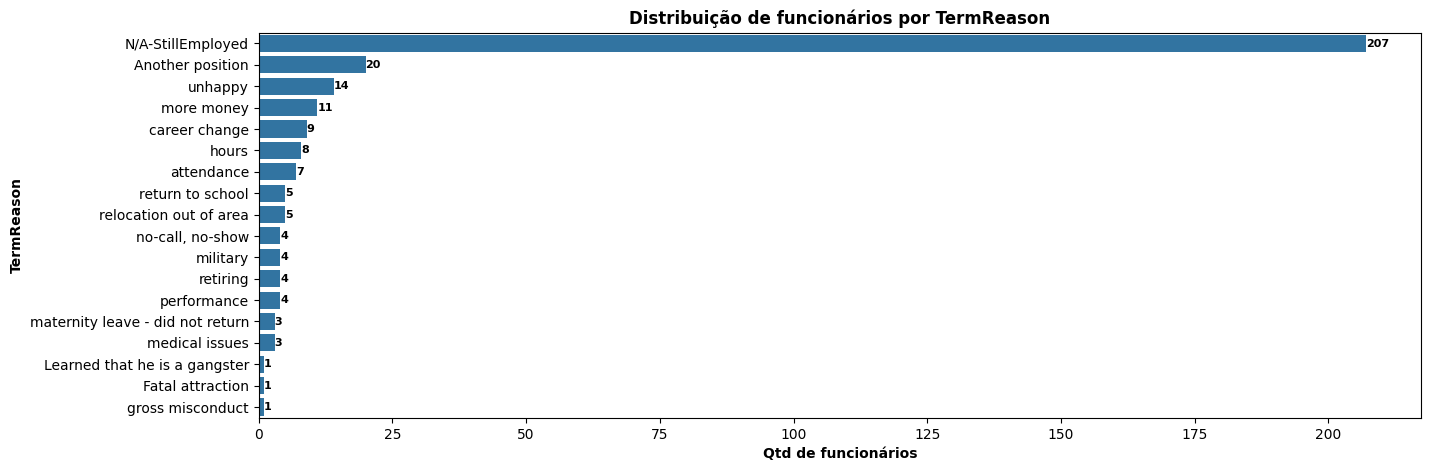

In [597]:
plt.figure(figsize=(15, 5))

sns.barplot(
    TermReason,
    y=TermReason.index,
    x="freq_absoluta",
    orient="h"
)

plt.title("Distribuição de funcionários por TermReason", fontdict={"fontweight":"bold"})
plt.ylabel("TermReason", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})


for index, data in enumerate(TermReason["freq_absoluta"]):
    plt.text(data, index, str(data), ha="left", va="center", weight="bold", size=8)
    
plt.show();

In [598]:
turnover_positivo = TermReason.loc["Another position":, "freq_absoluta"].to_frame("freq_absoluta")

In [599]:
turnover_positivo["freq_relativa"] = turnover_positivo["freq_absoluta"] / 104

In [600]:
turnover_positivo["freq_acumulada"] = turnover_positivo["freq_relativa"].cumsum()

In [601]:
turnover_positivo

,freq_absoluta,freq_relativa,freq_acumulada
TermReason,,,
Another position,20,0.192308,0.192308
unhappy,14,0.134615,0.326923
more money,11,0.105769,0.432692
career change,9,0.086538,0.519231
hours,8,0.076923,0.596154
attendance,7,0.067308,0.663462
return to school,5,0.048077,0.711538
relocation out of area,5,0.048077,0.759615
"no-call, no-show",4,0.038462,0.798077


## Variável: EmploymentStatus


Criando tabelas de frequência

In [602]:
EmploymentStatus = df["EmploymentStatus"].value_counts().to_frame("freq_absoluta")

In [603]:
EmploymentStatus["freq_relativa"] = df["EmploymentStatus"].value_counts(1)

In [604]:
EmploymentStatus["freq_acumulada"] = EmploymentStatus["freq_relativa"].cumsum()

In [605]:
EmploymentStatus

,freq_absoluta,freq_relativa,freq_acumulada
EmploymentStatus,,,
Active,207,0.665595,0.665595
Voluntarily Terminated,88,0.282958,0.948553
Terminated for Cause,16,0.051447,1.000000


Visualização de distribuição da variável: EmploymentStatus

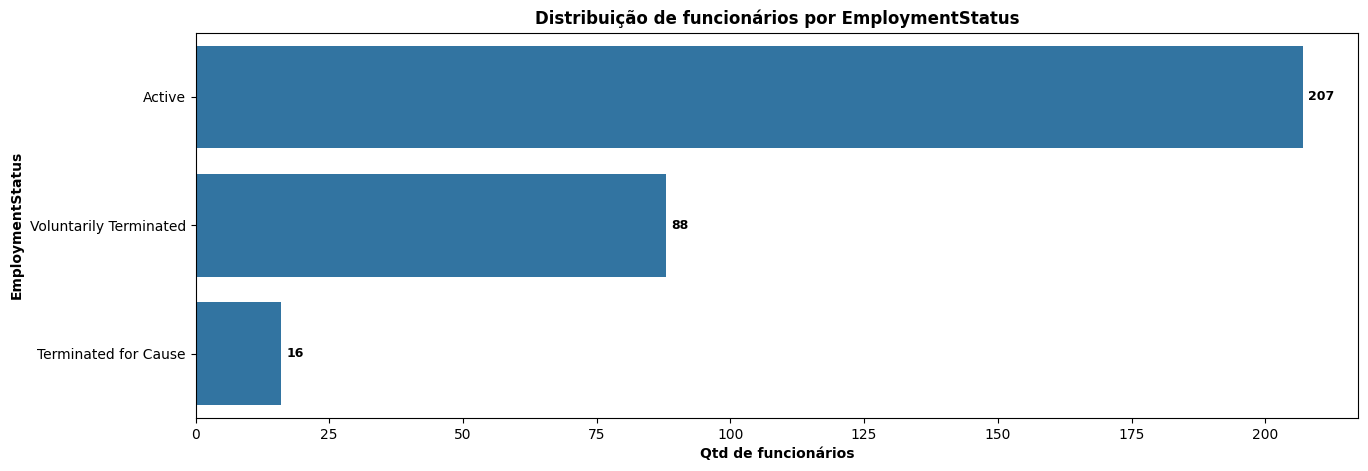

In [606]:
plt.figure(figsize=(15, 5))

sns.barplot(
    EmploymentStatus,
    x="freq_absoluta",
    y=EmploymentStatus.index,
    orient="h"
)

plt.title("Distribuição de funcionários por EmploymentStatus", fontdict={"fontweight":"bold"})
plt.ylabel("EmploymentStatus", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})

for index, data in enumerate(EmploymentStatus["freq_absoluta"]):
    plt.text(data+1, index, str(data), ha="left", va="center", weight="bold", size=9)

plt.show();

Entendendo a distribuição dos funcionários que tiveram turnover positivo

In [607]:
positive_turnover = EmploymentStatus.loc[["Voluntarily Terminated", "Terminated for Cause"], "freq_absoluta"].to_frame("freq_absoluta")

In [608]:
voluntario = positive_turnover.loc["Voluntarily Terminated", "freq_absoluta"]
justa_causa = positive_turnover.loc["Terminated for Cause", "freq_absoluta"]

In [609]:
positive_turnover

,freq_absoluta
EmploymentStatus,
Voluntarily Terminated,88
Terminated for Cause,16


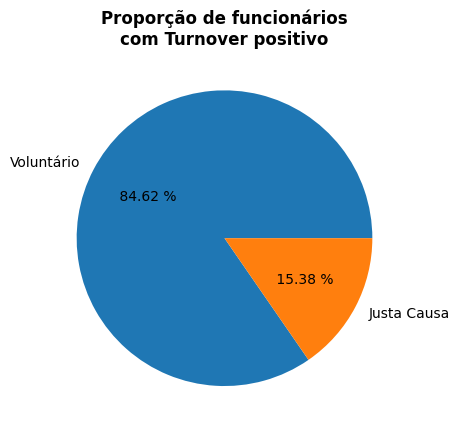

In [610]:
plt.pie(
    [voluntario, justa_causa],
    labels=["Voluntário", "Justa Causa"],
    autopct = "% .2f %%"
)

plt.title(f"Proporção de funcionários\ncom Turnover positivo", fontdict={"weight":"bold"})

plt.show()

## Variável: Department

Criação de tabela de frequência

In [611]:
Department = df["Department"].value_counts().to_frame("freq_absoluta")

In [612]:
Department["freq_relativa"] = df["Department"].value_counts(1)

In [613]:
Department["freq_acumulada"] = Department["freq_relativa"].cumsum()

In [614]:
Department

,freq_absoluta,freq_relativa,freq_acumulada
Department,,,
Production,209,0.672026,0.672026
IT/IS,50,0.160772,0.832797
Sales,31,0.099678,0.932476
Software Engineering,11,0.035370,0.967846
Admin Offices,9,0.028939,0.996785
Executive Office,1,0.003215,1.000000


Visualização de distribuição da variável: Department

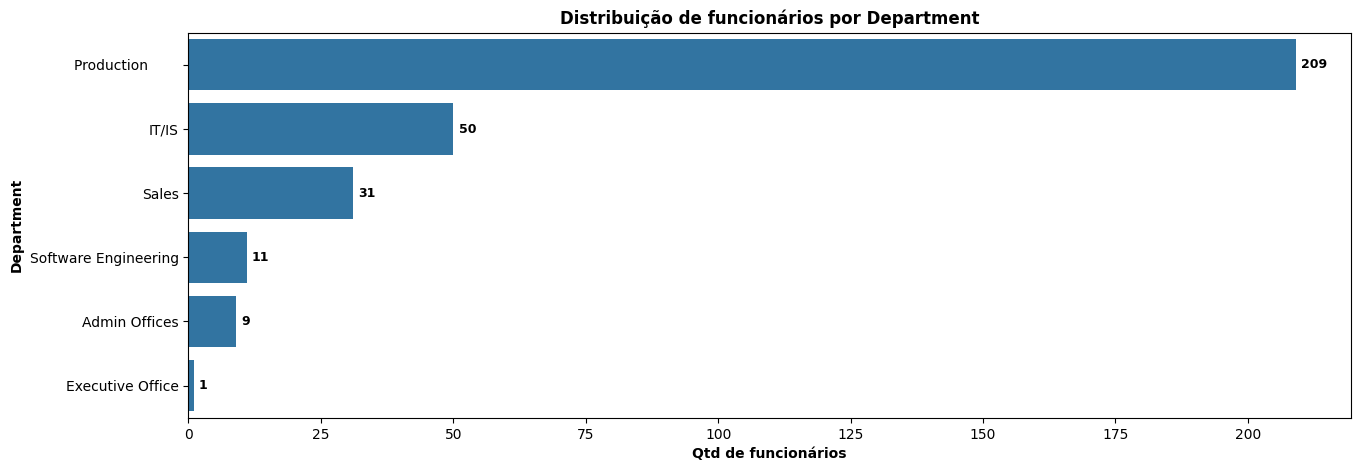

In [615]:
plt.figure(figsize=(15, 5))

sns.barplot(
    Department,
    x="freq_absoluta",
    y=Department.index,
    orient="h"
)

plt.title("Distribuição de funcionários por Department", fontdict={"fontweight":"bold"})
plt.ylabel("Department", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})

for index, data in enumerate(Department["freq_absoluta"]):
    plt.text(data+1, index, str(data), ha="left", va="center", weight="bold", size=9)

plt.show();

## Variável: ManagerName

Criação de tabela de frequência

In [616]:
ManagerName = df["ManagerName"].value_counts().to_frame("freq_absoluta")

In [617]:
ManagerName["freq_relativa"] = df["ManagerName"].value_counts(1)

In [618]:
ManagerName["freq_acumulada"] = ManagerName["freq_relativa"].cumsum()

In [619]:
ManagerName

,freq_absoluta,freq_relativa,freq_acumulada
ManagerName,,,
Michael Albert,22,0.070740,0.070740
Kissy Sullivan,22,0.070740,0.141479
Elijiah Gray,22,0.070740,0.212219
Kelley Spirea,22,0.070740,0.282958
Brannon Miller,22,0.070740,0.353698
Ketsia Liebig,21,0.067524,0.421222
David Stanley,21,0.067524,0.488746
Amy Dunn,21,0.067524,0.556270
Webster Butler,21,0.067524,0.623794


Visualização de distribuição da variável: ManagerName

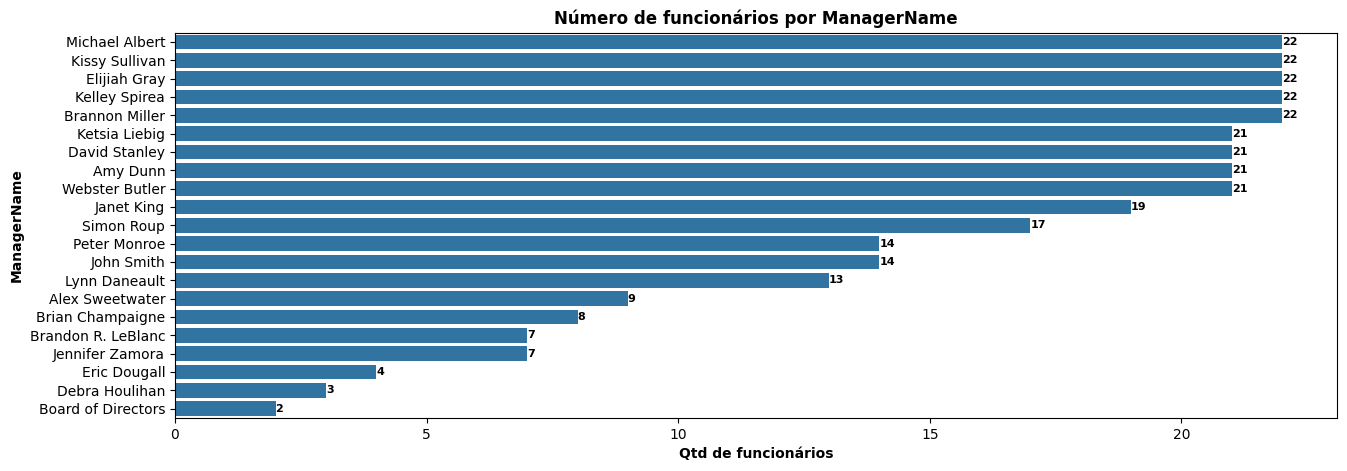

In [620]:
plt.figure(figsize=(15,5))

sns.barplot(
    ManagerName,
    x="freq_absoluta",
    y=ManagerName.index,
    orient="h"
)

plt.title("Número de funcionários por ManagerName", fontdict={"fontweight":"bold"})
plt.ylabel("ManagerName", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})

for index, data in enumerate(ManagerName["freq_absoluta"]):
    plt.text(data, index, str(data), ha="left", va="center", weight="bold", size=8)
    
plt.show();

## Variável: RecruitmentSource

Criação de tabela de frequência

In [621]:
RecruitmentSource = df["RecruitmentSource"].value_counts().to_frame("freq_absoluta")

In [622]:
RecruitmentSource["freq_relativa"] = df["RecruitmentSource"].value_counts(1)

In [623]:
RecruitmentSource["freq_acumulada"] = RecruitmentSource["freq_relativa"].cumsum()

In [624]:
RecruitmentSource

,freq_absoluta,freq_relativa,freq_acumulada
RecruitmentSource,,,
Indeed,87,0.279743,0.279743
LinkedIn,76,0.244373,0.524116
Google Search,49,0.157556,0.681672
Employee Referral,31,0.099678,0.781350
Diversity Job Fair,29,0.093248,0.874598
CareerBuilder,23,0.073955,0.948553
Website,13,0.041801,0.990354
Other,2,0.006431,0.996785
On-line Web application,1,0.003215,1.000000


Visualização de distribuição da variável: RecruitmentSource

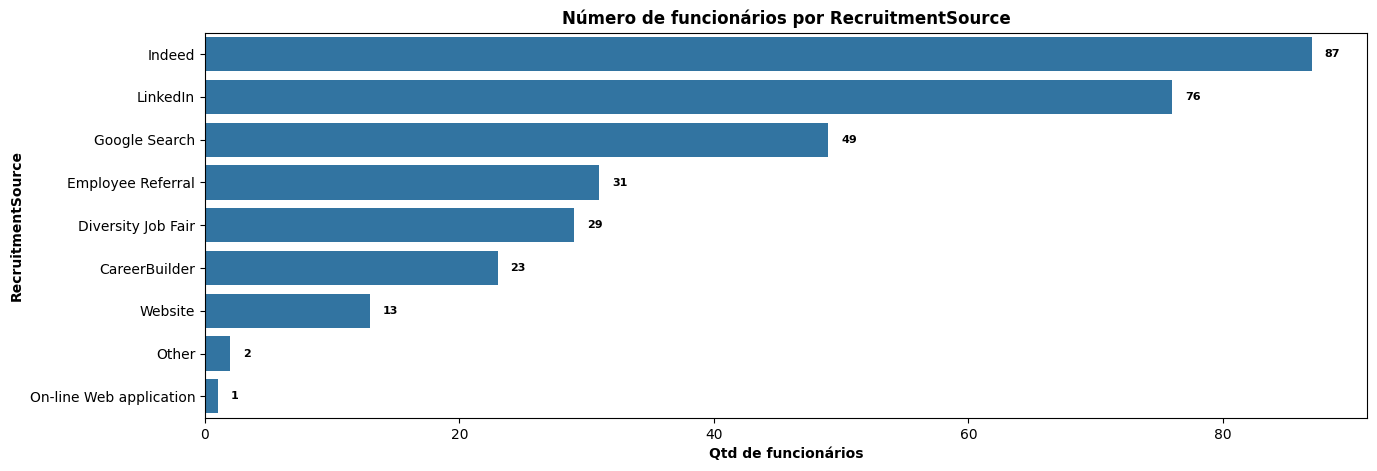

In [625]:
plt.figure(figsize=(15, 5))

sns.barplot(
    RecruitmentSource,
    x="freq_absoluta",
    y=RecruitmentSource.index,
    orient="h"
)

plt.title("Número de funcionários por RecruitmentSource", fontdict={"fontweight":"bold"})
plt.ylabel("RecruitmentSource", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})

for index, data in enumerate(RecruitmentSource["freq_absoluta"]):
    plt.text(data+1, index, str(data), ha="left", va="center", weight="bold", size=8)

plt.show();

## Variável: PerformanceScore

Criação de tabela de frequência

In [626]:
PerformanceScore = df["PerformanceScore"].value_counts().to_frame("freq_absoluta")

In [627]:
PerformanceScore["freq_relativa"] = df["PerformanceScore"].value_counts(1)

In [628]:
PerformanceScore["freq_acumulada"] = PerformanceScore["freq_relativa"].cumsum()

In [629]:
PerformanceScore

,freq_absoluta,freq_relativa,freq_acumulada
PerformanceScore,,,
Fully Meets,243,0.781350,0.781350
Exceeds,37,0.118971,0.900322
Needs Improvement,18,0.057878,0.958199
PIP,13,0.041801,1.000000


Visualização de distribuição da variável: PerformanceScore

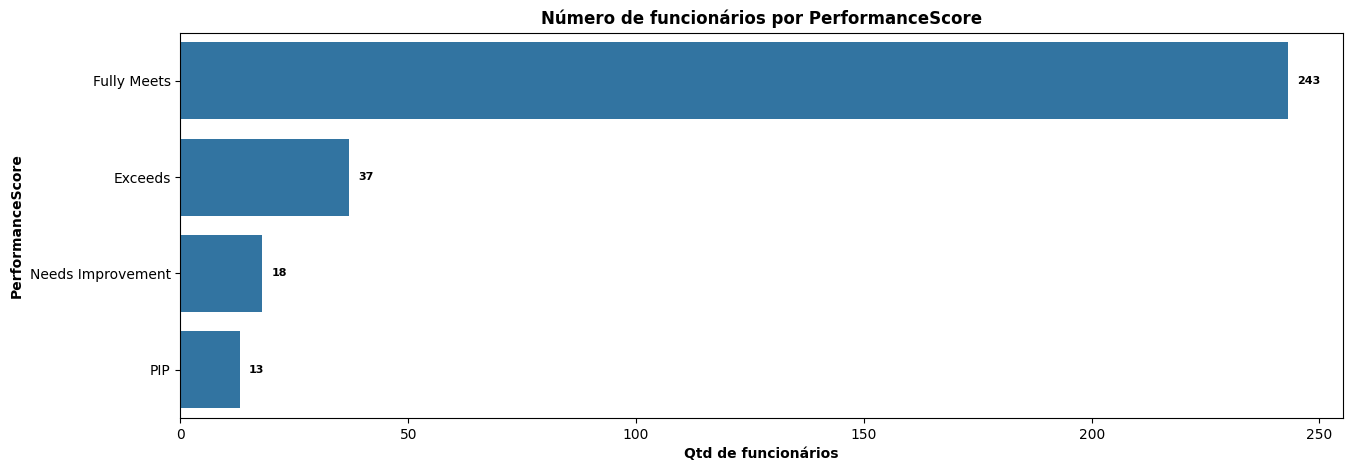

In [630]:
plt.figure(figsize=(15, 5))

sns.barplot(
    PerformanceScore,
    x="freq_absoluta",
    y=PerformanceScore.index,
    orient="h"
)

plt.title("Número de funcionários por PerformanceScore", fontdict={"fontweight":"bold"})
plt.ylabel("PerformanceScore", fontdict={"fontweight":"bold"})
plt.xlabel("Qtd de funcionários", fontdict={"fontweight":"bold"})

for index, data in enumerate(PerformanceScore["freq_absoluta"]):
    plt.text(data+2, index, str(data), ha="left", va="center", weight="bold", size=8)

plt.show();

## 2.2 Análise Bivariada

## 2.2.1 Análise de Correlação de Pearson

In [631]:
pearson = df.loc[:, ["Salary", "Turnover?","EngagementSurvey", "EmpSatisfaction", "SpecialProjectsCount", "DaysLateLast30", "Absences", "idade", "TempoEmpresa (meses)", "DiasUltAvaPerfom" ]]

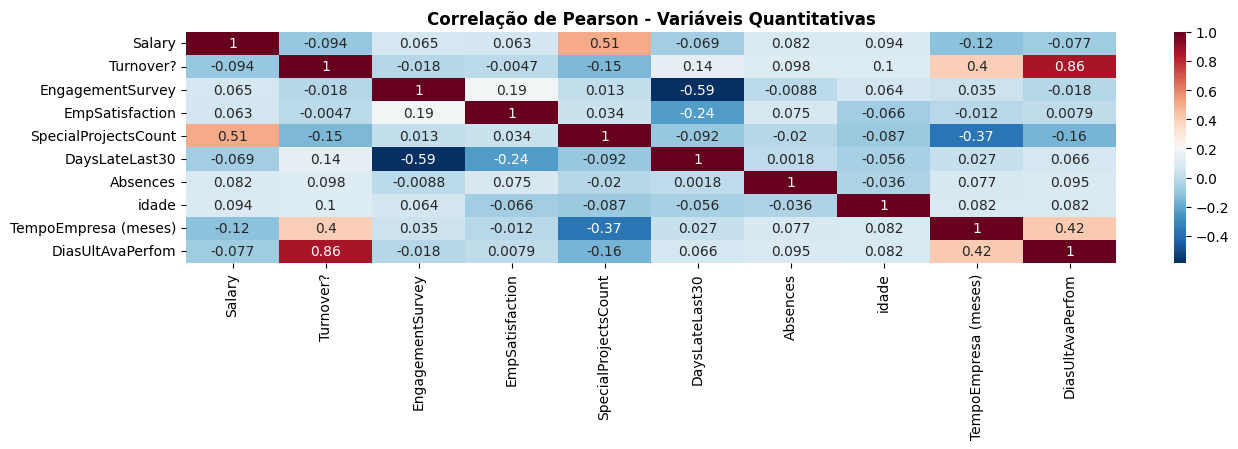

In [632]:
plt.figure(figsize=(15,3))

sns.heatmap(
    pearson.corr(),
    annot=True,
    cmap="RdBu_r"
)

plt.title("Correlação de Pearson - Variáveis Quantitativas", fontdict={"fontweight":"bold"});

## 2.2.2 Análise Information Value

Instalando e importando biblioteca para análise de IV

In [633]:
!pip install scorecardpy

In [634]:
import scorecardpy as sc

Definindo variáveis que serão incluídas no cálculo de IV

In [635]:
iv_calc = df.loc[:,
[
    "fx_salario",
    "Turnover?",
    "Position",
    "State",
    "Sex",
    "MaritalDesc",
    "CitizenDesc",
    "HispanicLatino",
    "RaceDesc",
    "Department",
    "ManagerName",
    "RecruitmentSource",
    "PerformanceScore",
    "fx_EngagementSurvey",
    "EmpSatisfaction",
    "SpecialProjectsCount",
    "DaysLateLast30",
    "fx_Absences",
    "fx_etaria",
    "fx_tempo_empresa",
    "fx_DiasDesdeUltimaAvaliaçãoDePerformance"
]]

In [636]:
information_value = sc.iv(iv_calc, "Turnover?")

Classificando os resultados dos coeficientes de IV

In [637]:
def classifica_iv(valor):
    if valor >= 0.5:
        classificacao = "Suspeitosamente bom"
    elif valor >= 0.3:
        classificacao = "Forte"
    elif valor >= 0.1:
        classificacao = "Médio"
    elif valor >= 0.02:
        classificacao = "Fraco"
    else:
        classificacao = "Inútil"
    return classificacao

In [638]:
information_value["classificacao"] = information_value["info_value"].apply(classifica_iv)

Renomeando coluna "info_value" para "IV"

In [639]:
information_value.rename(columns={"info_value":"IV"}, inplace=True)

Checando sucesso

In [640]:
information_value

,variable,IV,classificacao
19,fx_DiasDesdeUltimaAvaliaçãoDePerformance,6.834102,Suspeitosamente bom
17,fx_tempo_empresa,1.197033,Suspeitosamente bom
3,RecruitmentSource,0.608026,Suspeitosamente bom
14,ManagerName,0.587857,Suspeitosamente bom
9,Position,0.298951,Médio
15,MaritalDesc,0.222665,Médio
2,Department,0.203697,Médio
12,SpecialProjectsCount,0.199046,Médio
18,DaysLateLast30,0.165726,Médio
10,fx_etaria,0.136852,Médio


### Analisando, detalhadamente, variável: fx_DiasDesdeUltimaAvaliaçãoDePerformance

In [641]:
iv_fx_DiasUltimaAvalPerf = df[df["Turnover?"] == 1].loc[:, "fx_DiasDesdeUltimaAvaliaçãoDePerformance"].value_counts().sort_index(ascending=True).to_frame("Sim")

In [642]:
iv_fx_DiasUltimaAvalPerf["Não"] = df[df["Turnover?"] == 0].loc[:, "fx_DiasDesdeUltimaAvaliaçãoDePerformance"].value_counts().sort_index(ascending=True)

In [643]:
iv_fx_DiasUltimaAvalPerf["Total"] = iv_fx_DiasUltimaAvalPerf["Sim"] + iv_fx_DiasUltimaAvalPerf["Não"]

In [644]:
total_sim = iv_fx_DiasUltimaAvalPerf["Sim"].sum()
total_nao = iv_fx_DiasUltimaAvalPerf["Não"].sum()
total_total = iv_fx_DiasUltimaAvalPerf["Total"].sum()

In [645]:
iv_fx_DiasUltimaAvalPerf["% freq"] = iv_fx_DiasUltimaAvalPerf["Total"] / total_total
iv_fx_DiasUltimaAvalPerf["% sim"] = iv_fx_DiasUltimaAvalPerf["Sim"] / total_sim
iv_fx_DiasUltimaAvalPerf["% não"] = iv_fx_DiasUltimaAvalPerf["Não"] / total_nao
iv_fx_DiasUltimaAvalPerf["% turnover"] = iv_fx_DiasUltimaAvalPerf["Sim"] / iv_fx_DiasUltimaAvalPerf["Total"]
iv_fx_DiasUltimaAvalPerf["ODDS"] = iv_fx_DiasUltimaAvalPerf["% sim"] / iv_fx_DiasUltimaAvalPerf["% não"]

In [646]:
iv_fx_DiasUltimaAvalPerf.sort_values(by="% turnover", ascending=False)

,Sim,Não,Total,% freq,% sim,% não,% turnover,ODDS
fx_DiasDesdeUltimaAvaliaçãoDePerformance,,,,,,,,
2200 - 2514,9,0,9,0.029032,0.087379,0.0,1.000000,inf
2515 - 2829,9,0,9,0.029032,0.087379,0.0,1.000000,inf
2830 - 3144,18,0,18,0.058065,0.174757,0.0,1.000000,inf
3145 - 3459,23,0,23,0.074194,0.223301,0.0,1.000000,inf
3460 - 3774,9,0,9,0.029032,0.087379,0.0,1.000000,inf
3775 - 4089,10,0,10,0.032258,0.097087,0.0,1.000000,inf
4090 - 4404,12,0,12,0.038710,0.116505,0.0,1.000000,inf
4405 - 4719,8,0,8,0.025806,0.077670,0.0,1.000000,inf
4720 - 5037,3,0,3,0.009677,0.029126,0.0,1.000000,inf


### Analisando, detalhadamente, variável: fx_tempo_empresa

In [647]:
iv_fx_tempo_empresa = df[df["Turnover?"] == 1].loc[:, "fx_tempo_empresa"].value_counts().sort_index(ascending=True).to_frame("Sim")

In [648]:
iv_fx_tempo_empresa["Não"] = df[df["Turnover?"] == 0].loc[:, "fx_tempo_empresa"].value_counts().sort_index(ascending=True)

In [649]:
iv_fx_tempo_empresa["Total"] = iv_fx_tempo_empresa["Sim"] + iv_fx_tempo_empresa["Não"]

In [650]:
total_sim = iv_fx_tempo_empresa["Sim"].sum()
total_nao = iv_fx_tempo_empresa["Não"].sum()
total_total = iv_fx_tempo_empresa["Total"].sum()

In [651]:
iv_fx_tempo_empresa["freq"] = iv_fx_tempo_empresa["Total"] / total_total
iv_fx_tempo_empresa["% sim"] = iv_fx_tempo_empresa["Sim"] / total_sim
iv_fx_tempo_empresa["% não"] = iv_fx_tempo_empresa["Não"] / total_nao
iv_fx_tempo_empresa["% turnover"] = iv_fx_tempo_empresa["Sim"] / iv_fx_tempo_empresa["Total"]
iv_fx_tempo_empresa["ODDS"] = iv_fx_tempo_empresa["% sim"] / iv_fx_tempo_empresa["% não"]

In [652]:
iv_fx_tempo_empresa.rename(index={"fx_tempo_empresa":"fx_tempo_empresa (meses)"}, inplace=True)

In [653]:
iv_fx_tempo_empresa.sort_values(by="% turnover", ascending=False)

,Sim,Não,Total,freq,% sim,% não,% turnover,ODDS
fx_tempo_empresa,,,,,,,,
161.2-176.4,15,9,24,0.077419,0.144231,0.043689,0.625000,3.301282
146-161.2,58,37,95,0.306452,0.557692,0.179612,0.610526,3.104990
176.4-191.6,3,5,8,0.025806,0.028846,0.024272,0.375000,1.188462
191.6-206.8,1,2,3,0.009677,0.009615,0.009709,0.333333,0.990385
130.8-146,12,29,41,0.132258,0.115385,0.140777,0.292683,0.819629
100.4-115.6,8,38,46,0.148387,0.076923,0.184466,0.173913,0.417004
115.6-130.8,7,66,73,0.235484,0.067308,0.320388,0.095890,0.210082
70-85.2,0,3,3,0.009677,0.000000,0.014563,0.000000,0.000000
85.2-100.4,0,17,17,0.054839,0.000000,0.082524,0.000000,0.000000


### Analisando, detalhadamente, variável: RecruitmentSource

In [654]:
iv_RecruitmentSource = df[df["Turnover?"] == 1].loc[:, "RecruitmentSource"].value_counts().to_frame("Sim")

In [655]:
iv_RecruitmentSource["Não"] = df[df["Turnover?"] == 0].loc[:, "RecruitmentSource"].value_counts()
iv_RecruitmentSource["Não"] = iv_RecruitmentSource["Não"].fillna(0)
iv_RecruitmentSource["Não"] = iv_RecruitmentSource["Não"].astype("int")

In [656]:
iv_RecruitmentSource["Total"] = iv_RecruitmentSource["Sim"] + iv_RecruitmentSource["Não"]

In [657]:
total_sim = iv_RecruitmentSource["Sim"].sum()
total_nao = iv_RecruitmentSource["Não"].sum()
total_total = iv_RecruitmentSource["Total"].sum()

In [658]:
iv_RecruitmentSource["freq"] = iv_RecruitmentSource["Total"] / total_total
iv_RecruitmentSource["% sim"] = iv_RecruitmentSource["Sim"] / total_sim
iv_RecruitmentSource["% não"] = iv_RecruitmentSource["Não"] / total_nao
iv_RecruitmentSource["% turnover"] = iv_RecruitmentSource["Sim"] / iv_RecruitmentSource["Total"]
iv_RecruitmentSource["ODDS"] = iv_RecruitmentSource["% sim"] / iv_RecruitmentSource["% não"]

In [659]:
iv_RecruitmentSource.sort_values(by="% turnover", ascending=False)

,Sim,Não,Total,freq,% sim,% não,% turnover,ODDS
RecruitmentSource,,,,,,,,
On-line Web application,1,0,1,0.003215,0.009615,0.000000,1.000000,inf
Google Search,30,19,49,0.157556,0.288462,0.091787,0.612245,3.142713
Diversity Job Fair,16,13,29,0.093248,0.153846,0.062802,0.551724,2.449704
Other,1,1,2,0.006431,0.009615,0.004831,0.500000,1.990385
CareerBuilder,11,12,23,0.073955,0.105769,0.057971,0.478261,1.824519
Indeed,21,66,87,0.279743,0.201923,0.318841,0.241379,0.633304
LinkedIn,18,58,76,0.244373,0.173077,0.280193,0.236842,0.617706
Employee Referral,5,26,31,0.099678,0.048077,0.125604,0.161290,0.382766
Website,1,12,13,0.041801,0.009615,0.057971,0.076923,0.165865


### Analisando, detalhadamente, variável: ManagerName

In [660]:
iv_ManagerName = df[df["Turnover?"] == 1].loc[:, "ManagerName"].value_counts().to_frame("Sim")

In [661]:
iv_ManagerName["Não"] = df[df["Turnover?"] == 0].loc[:, "ManagerName"].value_counts()

In [662]:
iv_ManagerName["Total"] = iv_ManagerName["Sim"] + iv_ManagerName["Não"]

In [663]:
total_sim = iv_ManagerName["Sim"].sum()
total_nao = iv_ManagerName["Não"].sum()
total_total = iv_ManagerName["Total"].sum()

In [664]:
iv_ManagerName["% freq"] = iv_ManagerName["Total"] / total_total
iv_ManagerName["% sim"] = iv_ManagerName["Sim"] / total_sim
iv_ManagerName["% nao"] = iv_ManagerName["Não"] / total_nao
iv_ManagerName["% turnover"] = iv_ManagerName["Sim"] / iv_ManagerName["Total"]
iv_ManagerName["ODDS"] = iv_ManagerName["% sim"] / iv_ManagerName["% nao"]

In [665]:
iv_ManagerName.sort_values(by="% turnover", ascending=False)

,Sim,Não,Total,% freq,% sim,% nao,% turnover,ODDS
ManagerName,,,,,,,,
Amy Dunn,13,8,21,0.070707,0.125000,0.041451,0.619048,3.015625
Webster Butler,13,8,21,0.070707,0.125000,0.041451,0.619048,3.015625
Kissy Sullivan,12,10,22,0.074074,0.115385,0.051813,0.545455,2.226923
Simon Roup,8,9,17,0.057239,0.076923,0.046632,0.470588,1.649573
Michael Albert,9,13,22,0.074074,0.086538,0.067358,0.409091,1.284763
Elijiah Gray,8,14,22,0.074074,0.076923,0.072539,0.363636,1.060440
Alex Sweetwater,3,6,9,0.030303,0.028846,0.031088,0.333333,0.927885
Debra Houlihan,1,2,3,0.010101,0.009615,0.010363,0.333333,0.927885
Janet King,6,13,19,0.063973,0.057692,0.067358,0.315789,0.856509
